# Customer Relationship Marketing Machine Learning

In [214]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score, zero_one_loss
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
import timeit

<mark>Please note: it will take around 30 minutes to run this notebook.</mark>

### Q3 Load and pre-process the dataset 

In [215]:
start = timeit.default_timer()#set start timer for the project
crm = pd.read_csv('Customer relationship marketing (CRM).csv') 
print("Dataset has {} rows and {} columns".format(crm.shape[0],crm.shape[1]))
crm.head()

Dataset has 9134 rows and 20 columns


,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Number of Open Complaints,Number of Policies,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,0,1,Corporate L3,Offer1,Agent,384.811147,Two-Door Car
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,0,8,Personal L3,Offer3,Agent,1131.464935,Four-Door Car
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,0,2,Personal L3,Offer1,Agent,566.472247,Two-Door Car
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,0,7,Corporate L2,Offer1,Call Center,529.881344,SUV
4,Washington,2813.692575,No,Basic,Bachelor,2/03/2011,Employed,M,43836,Rural,Single,73,12,0,1,Personal L1,Offer1,Agent,138.130879,Four-Door Car


In [216]:
#check missing values
print(crm.isna().sum())
print()
print("Dataset has",sum(crm.isna().sum()),"missing values")

State                        0
Customer Lifetime Value      0
Response                     0
Coverage                     0
Education                    0
Effective To Date            0
EmploymentStatus             0
Gender                       0
Income                       0
Location Code                0
Marital Status               0
Monthly Premium Auto         0
Months Since Last Claim      0
Number of Open Complaints    0
Number of Policies           0
Policy                       0
Renew Offer Type             0
Sales Channel                0
Total Claim Amount           0
Vehicle Class                0
dtype: int64

Dataset has 0 missing values


In [217]:
#check data types
print("Any object type of variable will need convert to numerical")
crm.dtypes

Any object type of variable will need convert to numerical


State                         object
Customer Lifetime Value      float64
Response                      object
Coverage                      object
Education                     object
Effective To Date             object
EmploymentStatus              object
Gender                        object
Income                         int64
Location Code                 object
Marital Status                object
Monthly Premium Auto           int64
Months Since Last Claim        int64
Number of Open Complaints      int64
Number of Policies             int64
Policy                        object
Renew Offer Type              object
Sales Channel                 object
Total Claim Amount           float64
Vehicle Class                 object
dtype: object

In [218]:
#extract the column that is object type
crm_object=crm.select_dtypes(include=object)
#print out the unique variable of each object type
for i in range(crm_object.shape[1]):    
    print(crm_object.columns[i],"unique variables are:",crm_object[crm_object.columns[i]].unique())
    print()

State unique variables are: ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']

Response unique variables are: ['No' 'Yes']

Coverage unique variables are: ['Basic' 'Extended' 'Premium']

Education unique variables are: ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']

Effective To Date unique variables are: ['2/24/11' '1/31/11' '2/19/11' '1/20/11' '2/03/2011' '1/25/11' '1/18/11'
 '1/26/11' '2/17/11' '2/21/11' '1/06/2011' '2/06/2011' '1/10/2011'
 '1/17/11' '1/05/2011' '2/27/11' '1/14/11' '1/21/11' '2/05/2011' '1/29/11'
 '2/28/11' '2/12/2011' '2/02/2011' '2/07/2011' '1/22/11' '2/13/11'
 '1/15/11' '1/08/2011' '1/11/2011' '1/28/11' '2/08/2011' '2/23/11'
 '1/02/2011' '2/16/11' '1/27/11' '1/23/11' '1/09/2011' '2/11/2011'
 '2/04/2011' '2/01/2011' '2/15/11' '2/26/11' '1/16/11' '1/01/2011'
 '2/10/2011' '1/24/11' '2/25/11' '1/12/2011' '2/09/2011' '1/19/11'
 '1/04/2011' '2/14/11' '2/20/11' '2/18/11' '1/03/2011' '1/13/11' '1/30/11'
 '2/22/11' '1/07/2011']

EmploymentStatus uni

In [219]:
crm_dt=crm.copy()#make a copy of the data before tranformation

#apply labelEncoder to transform nominal variable to numerical variable
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html?highlight=labelencoder#sklearn.preprocessing.LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encode=LabelEncoder()

In [220]:
#state
print('State variable')
print()
print('state variable can be either nominal or ordinal data if we are assuming people lives in the capital city would more likely have higher income and needs to take up policy')
print('in this case, we treat it as nominal variable')
print('Arizona is 0, California is 1, Nevada is 2, Oregon is 3 and Washington is 4')
crm_dt.State=label_encode.fit_transform(crm_dt.State.astype('str'))
crm_dt.State

State variable

state variable can be either nominal or ordinal data if we are assuming people lives in the capital city would more likely have higher income and needs to take up policy
in this case, we treat it as nominal variable
Arizona is 0, California is 1, Nevada is 2, Oregon is 3 and Washington is 4


0       4
1       0
2       2
3       1
4       4
       ..
9129    1
9130    1
9131    1
9132    1
9133    1
Name: State, Length: 9134, dtype: int64

In [221]:
#response
print('Response - nominal variable')
print()
print('convert to numerical, so no is 0 and yes is 1')
crm_dt.Response=label_encode.fit_transform(crm_dt.Response.astype('str'))
crm_dt.Response

Response - nominal variable

convert to numerical, so no is 0 and yes is 1


0       0
1       0
2       0
3       0
4       0
       ..
9129    0
9130    1
9131    0
9132    0
9133    0
Name: Response, Length: 9134, dtype: int64

In [222]:
#converage
print('Converage - ordinal variable')
print()
print('Policy cost usually ranked from Premium, Extended then Basic,higher the cost rank higher')
print('label_encode can be applied on this variable, so basic is 0, extended is 1 and premium is 2')
crm_dt.Coverage=label_encode.fit_transform(crm_dt.Coverage.astype('str'))
crm_dt.Coverage

Converage - ordinal variable

Policy cost usually ranked from Premium, Extended then Basic,higher the cost rank higher
label_encode can be applied on this variable, so basic is 0, extended is 1 and premium is 2


0       0
1       1
2       2
3       0
4       0
       ..
9129    0
9130    1
9131    1
9132    1
9133    1
Name: Coverage, Length: 9134, dtype: int64

In [223]:
#education feature
print('Education feature-ordinal variable')
print()
print('Assuming people with higher education would have higher income to acquire motor vechicle so higher chance to get policy')
print("Total",len(crm_dt.Education.unique()),"unique attributes in the education feature, and they are",crm_dt.Education.unique(),".So we can assign Doctor with 4, Master with 3, Bachelor with 2, College with 1, and High School or Below with 0.")
#use pandas replace function to replace the value
crm_dt.Education.replace({"Doctor":4,"Master":3,"Bachelor":2,"College":1, "High School or Below":0},inplace=True)
crm_dt.Education

Education feature-ordinal variable

Assuming people with higher education would have higher income to acquire motor vechicle so higher chance to get policy
Total 5 unique attributes in the education feature, and they are ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor'] .So we can assign Doctor with 4, Master with 3, Bachelor with 2, College with 1, and High School or Below with 0.


0       2
1       2
2       2
3       2
4       2
       ..
9129    2
9130    1
9131    2
9132    1
9133    1
Name: Education, Length: 9134, dtype: int64

In [224]:
#effective to date
print('Effective To Date variable')
print('Format the all effective date to the same year format')
#format all year format from 2011 to 11
crm_dt['Effective To Date']=crm_dt['Effective To Date'].str.replace('2011','11')
print("Since the date variable has range from",crm_dt['Effective To Date'].min(),"to",crm_dt['Effective To Date'].max())
print("we could remove the year since all date within the same year, and separate day and month for modelling")

Effective To Date variable
Format the all effective date to the same year format
Since the date variable has range from 1/01/11 to 2/28/11
we could remove the year since all date within the same year, and separate day and month for modelling


In [225]:
#split the day and month with str.split 
#https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html
crm_dt['Effective To Date']=crm_dt['Effective To Date'].str.split('/')
#extract the day and format them by removing all 0 at the front then convert to integer
#https://pandas.pydata.org/docs/reference/api/pandas.Series.str.lstrip.html?highlight=lstrip
crm_dt['Effective_Day']=crm_dt['Effective To Date'].str[1].str.lstrip('0').astype('int64')
# crm_dt['Effective_Day']=crm_dt['Effective_Day'].astype('int')
crm_dt['Effective_Day']

0       24
1       31
2       19
3       20
4        3
        ..
9129    10
9130    12
9131     6
9132     3
9133    14
Name: Effective_Day, Length: 9134, dtype: int64

In [226]:
#extract the month and format them by removing all 0 at the front then convert to integer
crm_dt['Effective_Month']=crm_dt['Effective To Date'].str[0].str.lstrip('0').astype('int64')
crm_dt['Effective_Month']

0       2
1       1
2       2
3       1
4       2
       ..
9129    2
9130    2
9131    2
9132    2
9133    2
Name: Effective_Month, Length: 9134, dtype: int64

In [227]:
#finally drop original effective to date variable
crm_dt=crm_dt.drop(['Effective To Date'],axis=1)
crm_dt.head()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Last Claim,Number of Open Complaints,Number of Policies,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Effective_Day,Effective_Month
0,4,2763.519279,0,0,2,Employed,F,56274,Suburban,Married,...,32,0,1,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,24,2
1,0,6979.535903,0,1,2,Unemployed,F,0,Suburban,Single,...,13,0,8,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,31,1
2,2,12887.431650,0,2,2,Employed,F,48767,Suburban,Married,...,18,0,2,Personal L3,Offer1,Agent,566.472247,Two-Door Car,19,2
3,1,7645.861827,0,0,2,Unemployed,M,0,Suburban,Married,...,18,0,7,Corporate L2,Offer1,Call Center,529.881344,SUV,20,1
4,4,2813.692575,0,0,2,Employed,M,43836,Rural,Single,...,12,0,1,Personal L1,Offer1,Agent,138.130879,Four-Door Car,3,2


In [228]:
#EmploymentStatus
print('EmploymentStatus feature-ordinal variable')
print()
print('Assuming people with higher employment status would have higher income to acquire motor vechicle so higher chance to get policy')
print("Total",len(crm_dt.EmploymentStatus.unique()),"unique attributes in the EmpolymentStatus feature, and they are",crm_dt.EmploymentStatus.unique(),".So we can assign Employed with 4, Medical Leave with 3, Retired with 2, Unemployed with 1, and Disabled with 0.")
#use pandas replace function to replace the value
crm_dt.EmploymentStatus.replace({"Employed":4,"Medical Leave":3,"Retired":2,"Unemployed":1, "Disabled":0},inplace=True)
crm_dt.EmploymentStatus

EmploymentStatus feature-ordinal variable

Assuming people with higher employment status would have higher income to acquire motor vechicle so higher chance to get policy
Total 5 unique attributes in the EmpolymentStatus feature, and they are ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired'] .So we can assign Employed with 4, Medical Leave with 3, Retired with 2, Unemployed with 1, and Disabled with 0.


0       4
1       1
2       4
3       1
4       4
       ..
9129    4
9130    4
9131    1
9132    4
9133    1
Name: EmploymentStatus, Length: 9134, dtype: int64

In [229]:
#Gender
print('Gender - nominal variable')
print()
print('convert to numerical, so female is 0 and male is 1')
crm_dt.Gender=label_encode.fit_transform(crm_dt.Gender.astype('str'))
crm_dt.Gender

Gender - nominal variable

convert to numerical, so female is 0 and male is 1


0       0
1       0
2       0
3       1
4       1
       ..
9129    1
9130    0
9131    1
9132    1
9133    1
Name: Gender, Length: 9134, dtype: int64

In [230]:
#Location Code
print('Location Code-ordinal variable')
print()
print('Assuming people live in more remote area would have higher needs to acquire motor vechicle so higher chance to get policy')
print("Total",len(crm_dt['Location Code'].unique()),"unique attributes in the Location Code feature, and they are",crm_dt['Location Code'].unique(),".So we can assign Rural with 2, Suburban with 1 and Urban with 0.")
#use pandas replace function to replace the value
crm_dt['Location Code'].replace({"Rural":2,"Suburban":1,"Urban":0},inplace=True)
crm_dt['Location Code']

Location Code-ordinal variable

Assuming people live in more remote area would have higher needs to acquire motor vechicle so higher chance to get policy
Total 3 unique attributes in the Location Code feature, and they are ['Suburban' 'Rural' 'Urban'] .So we can assign Rural with 2, Suburban with 1 and Urban with 0.


0       1
1       1
2       1
3       1
4       2
       ..
9129    0
9130    1
9131    1
9132    1
9133    1
Name: Location Code, Length: 9134, dtype: int64

In [231]:
#Marital Status
print('Marital Status - nominal variable')
print()
print('convert to numerical, so Divorced is 0, Married is 1 and Single is 2')
crm_dt['Marital Status']=label_encode.fit_transform(crm_dt['Marital Status'].astype('str'))
crm_dt['Marital Status']

Marital Status - nominal variable

convert to numerical, so Divorced is 0, Married is 1 and Single is 2


0       1
1       2
2       1
3       1
4       2
       ..
9129    1
9130    0
9131    2
9132    1
9133    2
Name: Marital Status, Length: 9134, dtype: int64

In [232]:
#Policy
print('Policy - ordinal variable')
print()
print('Since not certain what ranking of this policy level would impace on the respons, we could just convert them to numerical with labelencoder')
crm_dt.Policy=label_encode.fit_transform(crm_dt.Policy.astype('str'))
crm_dt.Policy

Policy - ordinal variable

Since not certain what ranking of this policy level would impace on the respons, we could just convert them to numerical with labelencoder


0       2
1       5
2       5
3       1
4       3
       ..
9129    3
9130    2
9131    1
9132    4
9133    2
Name: Policy, Length: 9134, dtype: int64

In [233]:
#we could create a dictionary to see each number of label represent each policy level
list_policy=list(label_encode.inverse_transform(crm_dt.Policy.unique()))
dict_policy={}
for i in range(len(list_policy)):
    dict_policy[crm_dt.Policy.unique()[i]]=list_policy[i]
dict_policy

{2: 'Corporate L3',
 5: 'Personal L3',
 1: 'Corporate L2',
 3: 'Personal L1',
 7: 'Special L2',
 0: 'Corporate L1',
 4: 'Personal L2',
 6: 'Special L1',
 8: 'Special L3'}

In [234]:
#Renew Offer type
print('Renew Offer Type- nominal variable')
print()
print('Convert to numerical, so offer1 is 0, offer2 is 1, offer 3 is 2, and offer 4 is 3')
crm_dt['Renew Offer Type']=label_encode.fit_transform(crm_dt['Renew Offer Type'].astype('str'))
crm_dt['Renew Offer Type']

Renew Offer Type- nominal variable

Convert to numerical, so offer1 is 0, offer2 is 1, offer 3 is 2, and offer 4 is 3


0       0
1       2
2       0
3       0
4       0
       ..
9129    1
9130    0
9131    0
9132    2
9133    3
Name: Renew Offer Type, Length: 9134, dtype: int64

In [235]:
#sales channel
print('Sales Channel- nominal variable')
print()
print('Convert to numerical, so Agent is 0, Branch is 1, Call Center is 2 and Web is 3')
crm_dt['Sales Channel']=label_encode.fit_transform(crm_dt['Sales Channel'].astype('str'))
crm_dt['Sales Channel']

Sales Channel- nominal variable

Convert to numerical, so Agent is 0, Branch is 1, Call Center is 2 and Web is 3


0       0
1       0
2       0
3       2
4       0
       ..
9129    3
9130    1
9131    1
9132    1
9133    2
Name: Sales Channel, Length: 9134, dtype: int64

In [236]:
#vehicle class
print('Vehicle Class-ordinal variable')
print()
print('Assuming more expensive car would more likely need insurance policy')
print('also assuming both two door and four door cars are cheaper than the rest of the vechicle classes')
print('we can rank vechicle classes based on their potential values')
print()
print("Total",len(crm_dt['Vehicle Class'].unique()),"unique attributes are",crm_dt['Vehicle Class'].unique(),".So we can assign Luxury Car with 5, Luxury SUV with 4, Sport Car with 3, SUV with 2, Four-Door Car with 1, and Two-Door Car with 0.")
#use pandas replace function to replace the value
crm_dt['Vehicle Class'].replace({"Luxury Car":5,"Luxury SUV":4,"Sports Car":3,"SUV":2,"Four-Door Car":1, "Two-Door Car":0},inplace=True)
crm_dt['Vehicle Class']

Vehicle Class-ordinal variable

Assuming more expensive car would more likely need insurance policy
also assuming both two door and four door cars are cheaper than the rest of the vechicle classes
we can rank vechicle classes based on their potential values

Total 6 unique attributes are ['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car'] .So we can assign Luxury Car with 5, Luxury SUV with 4, Sport Car with 3, SUV with 2, Four-Door Car with 1, and Two-Door Car with 0.


0       0
1       1
2       0
3       2
4       1
       ..
9129    1
9130    1
9131    1
9132    1
9133    0
Name: Vehicle Class, Length: 9134, dtype: int64

In [237]:
print("all nominal and ordinal values have converted to numerical numbers")
print()
print(crm_dt.dtypes)
crm_dt

all nominal and ordinal values have converted to numerical numbers

State                          int64
Customer Lifetime Value      float64
Response                       int64
Coverage                       int64
Education                      int64
EmploymentStatus               int64
Gender                         int64
Income                         int64
Location Code                  int64
Marital Status                 int64
Monthly Premium Auto           int64
Months Since Last Claim        int64
Number of Open Complaints      int64
Number of Policies             int64
Policy                         int64
Renew Offer Type               int64
Sales Channel                  int64
Total Claim Amount           float64
Vehicle Class                  int64
Effective_Day                  int64
Effective_Month                int64
dtype: object


,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Last Claim,Number of Open Complaints,Number of Policies,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Effective_Day,Effective_Month
0,4,2763.519279,0,0,2,4,0,56274,1,1,...,32,0,1,2,0,0,384.811147,0,24,2
1,0,6979.535903,0,1,2,1,0,0,1,2,...,13,0,8,5,2,0,1131.464935,1,31,1
2,2,12887.431650,0,2,2,4,0,48767,1,1,...,18,0,2,5,0,0,566.472247,0,19,2
3,1,7645.861827,0,0,2,1,1,0,1,1,...,18,0,7,1,0,2,529.881344,2,20,1
4,4,2813.692575,0,0,2,4,1,43836,2,2,...,12,0,1,3,0,0,138.130879,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1,23405.987980,0,0,2,4,1,71941,0,1,...,18,0,2,3,1,3,198.234764,1,10,2
9130,1,3096.511217,1,1,1,4,0,21604,1,0,...,14,0,1,2,0,1,379.200000,1,12,2
9131,1,8163.890428,0,1,2,1,1,0,1,2,...,9,3,2,1,0,1,790.784983,1,6,2
9132,1,7524.442436,0,1,1,4,1,21941,1,1,...,34,0,3,4,2,1,691.200000,1,3,2


In [238]:
'''Both Customer Lifetime value and Total claim amount have 6 decimal places, we could convert them to 2 decimal places to keep the data homogeneous'''

'Both Customer Lifetime value and Total claim amount have 6 decimal places, we could convert them to 2 decimal places to keep the data homogeneous'

In [239]:
crm_dt['Customer Lifetime Value']=round(crm_dt['Customer Lifetime Value'],2)
crm_dt['Total Claim Amount']=round(crm_dt['Total Claim Amount'],2)
crm_dt

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Last Claim,Number of Open Complaints,Number of Policies,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Effective_Day,Effective_Month
0,4,2763.52,0,0,2,4,0,56274,1,1,...,32,0,1,2,0,0,384.81,0,24,2
1,0,6979.54,0,1,2,1,0,0,1,2,...,13,0,8,5,2,0,1131.46,1,31,1
2,2,12887.43,0,2,2,4,0,48767,1,1,...,18,0,2,5,0,0,566.47,0,19,2
3,1,7645.86,0,0,2,1,1,0,1,1,...,18,0,7,1,0,2,529.88,2,20,1
4,4,2813.69,0,0,2,4,1,43836,2,2,...,12,0,1,3,0,0,138.13,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1,23405.99,0,0,2,4,1,71941,0,1,...,18,0,2,3,1,3,198.23,1,10,2
9130,1,3096.51,1,1,1,4,0,21604,1,0,...,14,0,1,2,0,1,379.20,1,12,2
9131,1,8163.89,0,1,2,1,1,0,1,2,...,9,3,2,1,0,1,790.78,1,6,2
9132,1,7524.44,0,1,1,4,1,21941,1,1,...,34,0,3,4,2,1,691.20,1,3,2


In [240]:
#Separate the data into feature and target labels
X = crm_dt.drop(['Response'],axis=1) #feature labels
y = crm_dt['Response'] #target label
#split the dataset with 80/20 split in random
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2, random_state=16)
#print data shape
#training data use for examine the feature important and model training
print("Training data")
print(Xtrain.shape)
print (ytrain.shape)
print("Testing data")
#testing data reserved for final testing 
print (Xtest.shape)
print (ytest.shape)

Training data
(7307, 20)
(7307,)
Testing data
(1827, 20)
(1827,)


### Q4 Analyse the importance of the features for predicting customer response using two different approaches.

In [241]:
'''We would only use the training data to examine the feature important since testing data is now considered as unseen data'''

'We would only use the training data to examine the feature important since testing data is now considered as unseen data'

#### Examine Correlation 

In [242]:
#combine feature and target labels back to form the train dataset
crm_train = Xtrain.copy() 
crm_train["Response"]=ytrain.copy()
crm_train 

,State,Customer Lifetime Value,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,...,Number of Open Complaints,Number of Policies,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Effective_Day,Effective_Month,Response
4937,0,12780.28,0,3,4,0,33514,0,1,105,...,0,2,4,0,1,265.22,3,24,2,0
5196,3,31920.77,0,1,4,0,58542,2,1,114,...,0,2,5,1,1,129.99,2,28,1,0
7275,1,15860.04,1,3,1,0,0,2,1,136,...,0,2,3,0,1,46.10,2,25,2,0
3937,3,8624.92,0,3,4,0,43610,1,1,106,...,0,5,5,1,0,508.80,3,8,1,0
4152,3,7212.52,1,0,1,1,0,1,1,97,...,0,3,1,0,0,498.78,0,21,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,3,4037.50,0,1,4,1,90760,2,1,103,...,2,1,8,1,1,133.48,2,18,2,0
1345,3,2872.98,0,2,4,1,36844,0,1,73,...,0,1,5,1,0,283.97,1,22,1,0
581,0,7457.24,0,0,1,0,0,1,1,198,...,1,1,5,0,1,1577.67,5,22,2,0
2169,3,21274.34,1,4,3,1,17932,1,1,79,...,0,2,5,1,2,379.20,1,22,1,0


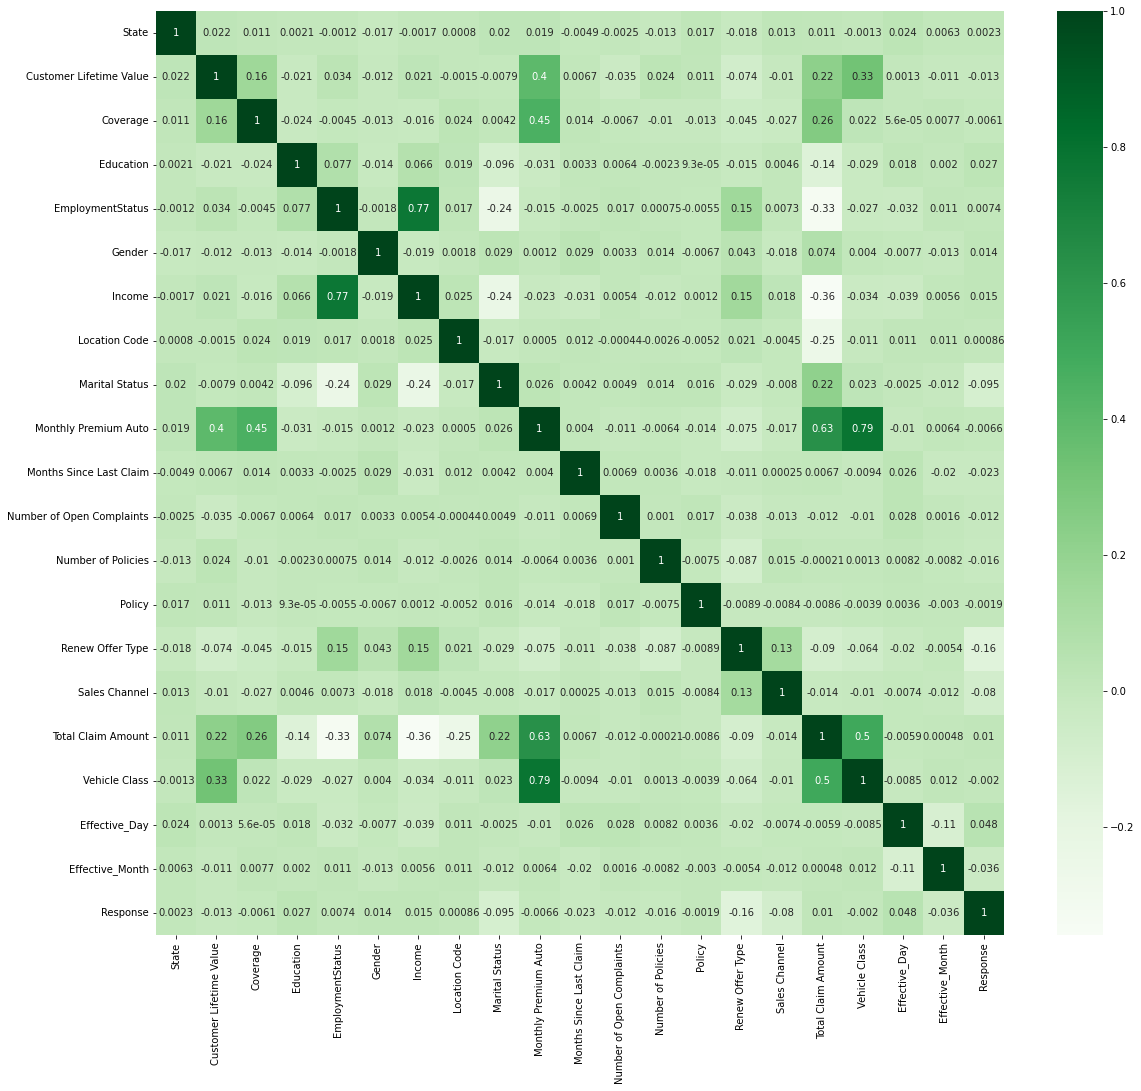

In [243]:
#the higher correlated the indepdent feature with dependent feature, the higher the importance
#https://towardsdatascience.com/why-feature-correlation-matters-a-lot-847e8ba439c4
import seaborn as sns
plt.figure(figsize=(19,17))
corr_train = crm_train.corr() #Pearson correlation measure
sns.heatmap(corr_train, annot=True, cmap=plt.cm.Greens)
plt.show()

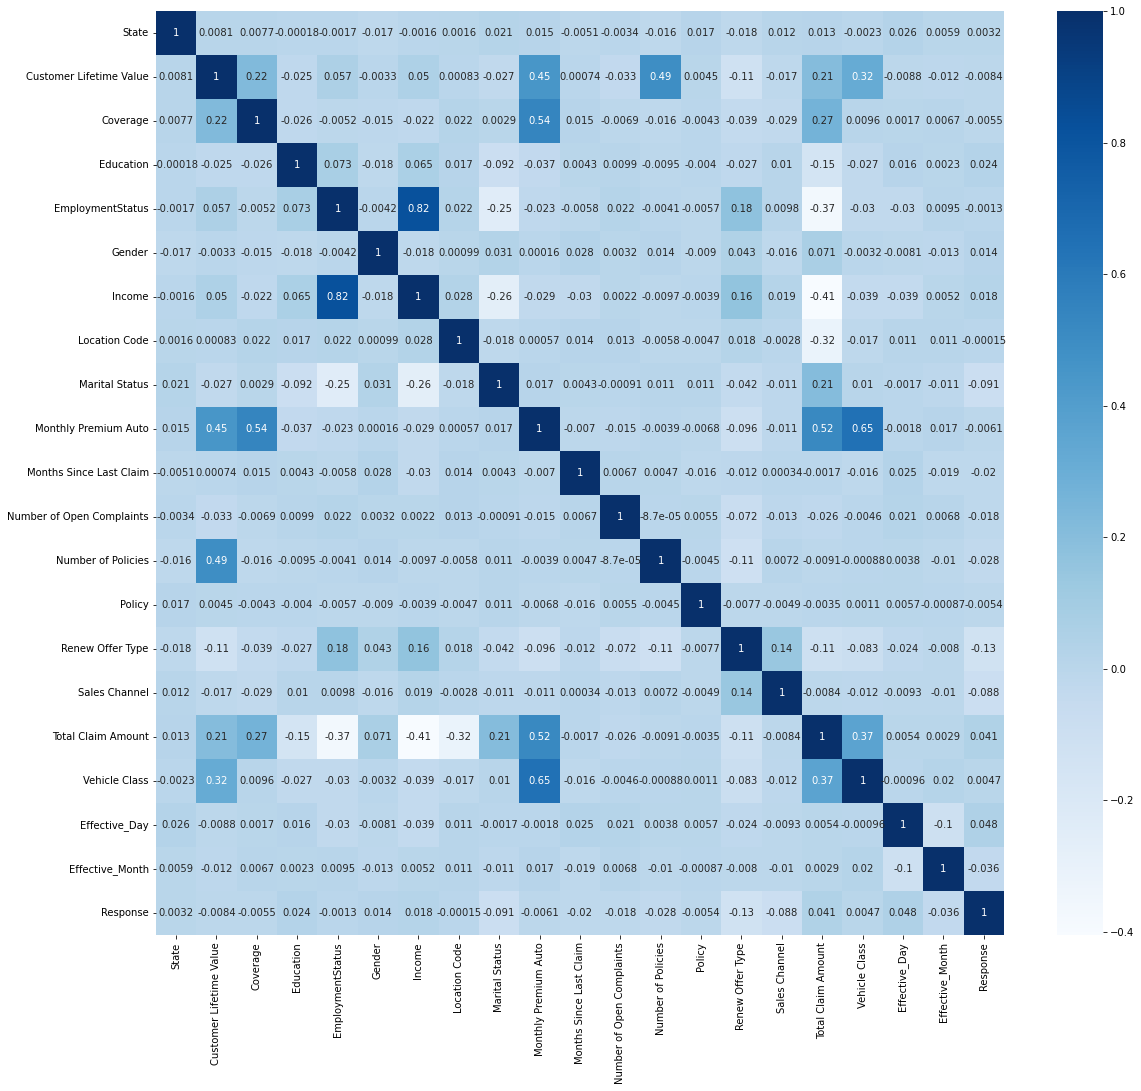

In [244]:
plt.figure(figsize=(19,17))
corrs_train = crm_train.corr(method='spearman') #Spearman correlation measure
sns.heatmap(corrs_train, annot=True, cmap=plt.cm.Blues)
plt.show()

In [245]:
#Correlation with output variable
corr_target = abs(corr_train["Response"])
corrs_target = abs(corrs_train["Response"])
#Selecting highly correlated features
relevant_pearson = corr_target[corr_target>0.5]
print("Most relevent feature from Pearson correlation measure:",relevant_pearson)
relevant_spearman = corrs_target[corr_target>0.5]
print("Most relevent feature from Spearman correlation measure:",relevant_spearman)

Most relevent feature from Pearson correlation measure: Response    1.0
Name: Response, dtype: float64
Most relevent feature from Spearman correlation measure: Response    1.0
Name: Response, dtype: float64


In [246]:
#no strong reason to either to keep or remove feature which have a low correaltion with the target variable
#https://datascience.stackexchange.com/questions/63558/should-features-be-correlated-or-uncorrelated-for-classification
'''Since none of the independent features is highly correlated with dependent variable, we would try examine the correlation between each independent features'''

'Since none of the independent features is highly correlated with dependent variable, we would try examine the correlation between each independent features'

In [247]:
'''we could try to identify feature importance based on the linear and/or non-linear correlation between each independent feature'''
#https://towardsdatascience.com/why-feature-correlation-matters-a-lot-847e8ba439c4

'we could try to identify feature importance based on the linear and/or non-linear correlation between each independent feature'

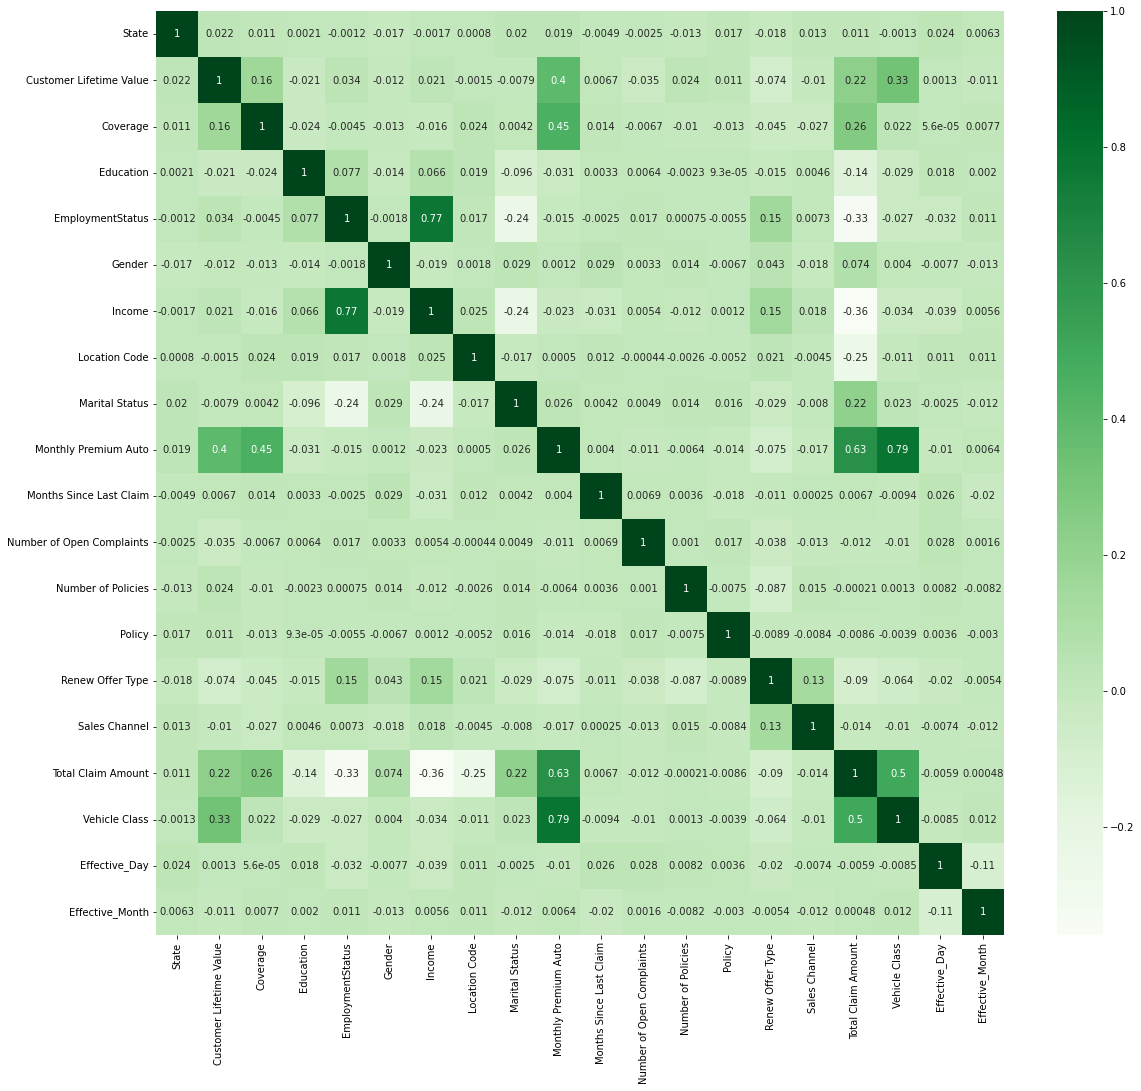

In [248]:
#Pearson measure
corr_Xtrain = Xtrain.corr()
plt.figure(figsize=(19,17))
sns.heatmap(corr_Xtrain, annot=True, cmap=plt.cm.Greens)
plt.show()

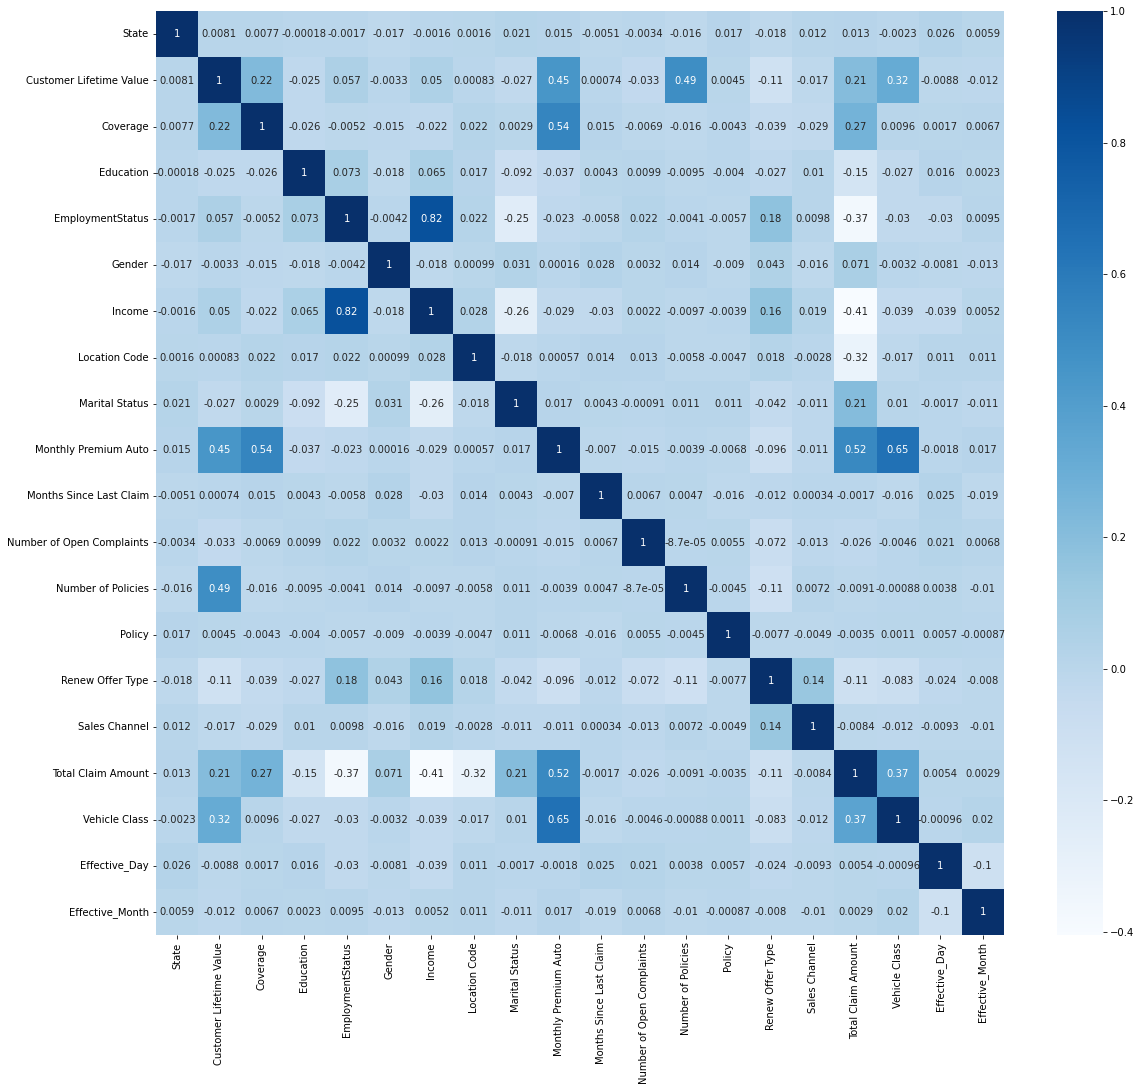

In [249]:
#Spearman measure
corrs_Xtrain = Xtrain.corr(method="spearman")
plt.figure(figsize=(19,17))
sns.heatmap(corrs_Xtrain, annot=True, cmap=plt.cm.Blues)
plt.show()

In [250]:
#create a function to extract feature that highly correlated with each other
#output the first feature that highly correlated with other feature
#code structure reference from #https://www.youtube.com/watch?v=FndwYNcVe0U&t=147s
def high_importance(data,rate):
    corr_pearson = data.corr() #pearson correlation
    feature_pearson=set() #create a set to store the name of correlated feature
    corr_spearman = data.corr(method="spearman") #spearman correlation
    feature_spearman=set() #create a set to store the name of correlated feature
    #iterate all the correlation to identify high correlated features
    for i in range (len(corr_pearson.columns)): 
        for j in range(i):
            if abs(corr_pearson.iloc[i,j]) < rate: #absolute coefficent value
                feature_pearson.add(corr_pearson.columns[i])# add to the set
    for i in range (len(corr_spearman.columns)): 
        for j in range(i):
            if abs(corr_spearman.iloc[i,j]) < rate: #absolute coefficent value
                feature_spearman.add(corr_spearman.columns[i])# add to the set
    print("Pearson Measure:",feature_pearson)
    print("Spearman Measure:",feature_spearman)

In [251]:
#set the correlation rate to 0.0001 to identify least correlated predictor feature
corr_rate=0.0001
print("By setting correlation rate at",corr_rate,",the function the following features are the most important (least correlated) according to different correlation measures")
print()
high_importance(Xtrain,corr_rate)

By setting correlation rate at 0.0001 ,the function the following features are the most important (least correlated) according to different correlation measures

Pearson Measure: {'Policy', 'Effective_Day'}
Spearman Measure: {'Number of Policies'}


In [252]:
#set the correlation rate to 0.0005 to identify lesser correlated predictor feature
corr_rate=0.0005
print("By setting correlation rate at",corr_rate,",the function the following features are the most important (least correlated) according to different correlation measures")
print()
high_importance(Xtrain,corr_rate)

By setting correlation rate at 0.0005 ,the function the following features are the most important (least correlated) according to different correlation measures

Pearson Measure: {'Number of Open Complaints', 'Effective_Day', 'Total Claim Amount', 'Sales Channel', 'Policy', 'Effective_Month'}
Spearman Measure: {'Education', 'Monthly Premium Auto', 'Number of Policies', 'Sales Channel'}


In [253]:
#create a function to extract feature that highly correlated with each other
#output the first feature that highly correlated with other feature
#code structure reference from #https://www.youtube.com/watch?v=FndwYNcVe0U&t=147s
def least_importance(data,rate):
    corr_pearson = data.corr() #pearson correlation
    feature_pearson=set() #create a set to store the name of correlated feature
    corr_spearman = data.corr(method="spearman") #spearman correlation
    feature_spearman=set() #create a set to store the name of correlated feature
    #iterate all the correlation to identify high correlated features
    for i in range (len(corr_pearson.columns)): 
        for j in range(i):
            if abs(corr_pearson.iloc[i,j]) > rate: #absolute coefficent value
                feature_pearson.add(corr_pearson.columns[i])# add to the set
    for i in range (len(corr_spearman.columns)): 
        for j in range(i):
            if abs(corr_spearman.iloc[i,j]) > rate: #absolute coefficent value
                feature_spearman.add(corr_spearman.columns[i])# add to the set
    print("Pearson Measure:",feature_pearson)
    print("Spearman Measure:",feature_spearman)

In [254]:
#set the correlation rate to 1 to identify pefectly correlated predictor feature
corr_rate=1
print("By setting correlation rate at",corr_rate,",the function suggest no independent features are perfectly correlated according to different correlation measures")
print()
least_importance(Xtrain,corr_rate)

By setting correlation rate at 1 ,the function suggest no independent features are perfectly correlated according to different correlation measures

Pearson Measure: set()
Spearman Measure: set()


In [255]:
print("The following independent feature(s) that have correlation rate above 70% with other features")
print("Note: Output selects the first correlated feature,for example,the function found that Income highly correlated with EmploymentStatus, it would output Income feature")
print()
corr_rate=0.7
print("With set correlation rate at",corr_rate,",the function suggest the following independent features have the least feature importance according to different correlation measures")
print()
least_importance(Xtrain,corr_rate)

The following independent feature(s) that have correlation rate above 70% with other features
Note: Output selects the first correlated feature,for example,the function found that Income highly correlated with EmploymentStatus, it would output Income feature

With set correlation rate at 0.7 ,the function suggest the following independent features have the least feature importance according to different correlation measures

Pearson Measure: {'Vehicle Class', 'Income'}
Spearman Measure: {'Income'}


In [256]:
print("If we lower the correlation rate to 60%, the function will look for independent features that have correlation higher than 60%")
print()
corr_rate=0.6
print("With set correlation rate at",corr_rate,",the function suggest the following independent features have the least feature importance according to different correlation measures")
print()
least_importance(Xtrain,corr_rate)

If we lower the correlation rate to 60%, the function will look for independent features that have correlation higher than 60%

With set correlation rate at 0.6 ,the function suggest the following independent features have the least feature importance according to different correlation measures

Pearson Measure: {'Total Claim Amount', 'Vehicle Class', 'Income'}
Spearman Measure: {'Vehicle Class', 'Income'}


#### Approach 1 - use Coefficients to measure feature importance

In [257]:
#use Counter function to see if the training data has class inbalance
#https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/
from collections import Counter
print(Counter(crm_train.Response))#showing class inbalance (6:1) in the target variable 

Counter({0: 6266, 1: 1041})


In [258]:
#Logistic Regression Feature Importance
#https://machinelearningmastery.com/calculate-feature-importance-with-python/
from sklearn.linear_model import LogisticRegressionCV
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegressionCV
lr_model = LogisticRegressionCV(cv=5, random_state=16, max_iter=1000,class_weight='balanced')
# fit the model
lr_model.fit(Xtrain, ytrain)
# extract importance scores 
f_importance_lr = lr_model.coef_[0]
# summarize feature importance
for i,v in enumerate(f_importance_lr):
    v=round(v,4)
    print("Feature {} importance score: {}".format(Xtrain.columns[i],v))

Feature State importance score: -0.0007
Feature Customer Lifetime Value importance score: -0.0
Feature Coverage importance score: -0.003
Feature Education importance score: 0.0118
Feature EmploymentStatus importance score: -0.0028
Feature Gender importance score: 0.006
Feature Income importance score: 0.0
Feature Location Code importance score: 0.005
Feature Marital Status importance score: -0.0421
Feature Monthly Premium Auto importance score: -0.003
Feature Months Since Last Claim importance score: -0.0066
Feature Number of Open Complaints importance score: -0.0112
Feature Number of Policies importance score: -0.0125
Feature Policy importance score: -0.0024
Feature Renew Offer Type importance score: -0.1167
Feature Sales Channel importance score: -0.053
Feature Total Claim Amount importance score: 0.0005
Feature Vehicle Class importance score: 0.0055
Feature Effective_Day importance score: 0.0177
Feature Effective_Month importance score: -0.0121


In [259]:
'''The positive scores indicate how well a feature predict Response value 1, and the negative scores indicate how well the feature predict Response value 0.''' 

'The positive scores indicate how well a feature predict Response value 1, and the negative scores indicate how well the feature predict Response value 0.'

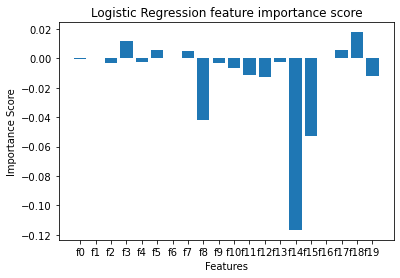

In [260]:
#create feature labels for the plot
f_label=[]
for i in range (len(f_importance_lr)):
    label='f'+str(i)
    f_label.append(label)
#plot feature importance score  
plt.bar(f_label, f_importance_lr)
plt.xlabel("Features")
plt.ylabel('Importance Score')
plt.title("Logistic Regression feature importance score")
plt.show()

#### Approach 2 - use Gini Impurity as feature importance measure

In [261]:
#Decision Tree Classification Feature Importance
#https://machinelearningmastery.com/calculate-feature-importance-with-python/
from sklearn.tree import DecisionTreeClassifier
#create decision tree model
dtree_model = DecisionTreeClassifier(random_state=16,class_weight='balanced')
# fit the model
dtree_model.fit(Xtrain, ytrain)
# extract feature importance score
f_importance_dtree = dtree_model.feature_importances_
# summarize feature importance
for i,v in enumerate(f_importance_dtree):
    v=round(v,4)
    print("Feature {} importance score: {}".format(Xtrain.columns[i],v))

Feature State importance score: 0.0
Feature Customer Lifetime Value importance score: 0.0974
Feature Coverage importance score: 0.0075
Feature Education importance score: 0.0425
Feature EmploymentStatus importance score: 0.0405
Feature Gender importance score: 0.0032
Feature Income importance score: 0.1144
Feature Location Code importance score: 0.0102
Feature Marital Status importance score: 0.0379
Feature Monthly Premium Auto importance score: 0.0764
Feature Months Since Last Claim importance score: 0.0804
Feature Number of Open Complaints importance score: 0.0308
Feature Number of Policies importance score: 0.0286
Feature Policy importance score: 0.001
Feature Renew Offer Type importance score: 0.1742
Feature Sales Channel importance score: 0.0211
Feature Total Claim Amount importance score: 0.1185
Feature Vehicle Class importance score: 0.006
Feature Effective_Day importance score: 0.0979
Feature Effective_Month importance score: 0.0117


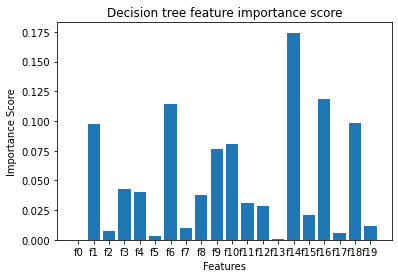

In [262]:
#plot feature importance score  
plt.bar(f_label, f_importance_dtree)
plt.xlabel("Features")
plt.ylabel('Importance Score')
plt.title("Decision tree feature importance score")
plt.show()

#### Comparing results from both approaches 

In [263]:
#importance scores from both approaches
#convert the importance score from logistic regression to absolute value for comparsion
f_impor_df=pd.DataFrame(data={'Feature':Xtrain.columns,'LogisticRegression_Score':abs(f_importance_lr),'DecisionTree_Score':f_importance_dtree})
f_impor_df

,Feature,LogisticRegression_Score,DecisionTree_Score
0,State,0.000740,0.000022
1,Customer Lifetime Value,0.000006,0.097367
2,Coverage,0.002980,0.007486
3,Education,0.011752,0.042485
4,EmploymentStatus,0.002826,0.040474
5,Gender,0.005958,0.003217
6,Income,0.000004,0.114352
7,Location Code,0.004965,0.010164
8,Marital Status,0.042086,0.037875
9,Monthly Premium Auto,0.002958,0.076447


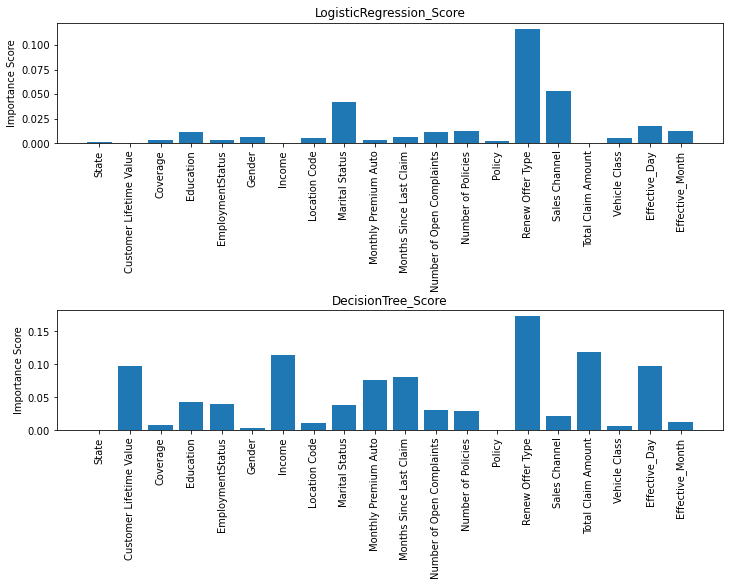

In [264]:
#plot feature importance score comparison

plt.figure(figsize=(10,8))#set plots size
plt.subplot(2,1,1)
plt.bar(f_impor_df['Feature'], abs(f_importance_lr)) #convert the score to abs value
#plt.xlabel("Features")
plt.xticks(rotation=90) 
plt.ylabel('Importance Score')
plt.title("LogisticRegression_Score")

plt.subplot(2,1,2)
plt.bar(f_impor_df['Feature'], f_importance_dtree)
#plt.xlabel("Features")
plt.xticks(rotation=90) 
plt.ylabel('Importance Score')
plt.title("DecisionTree_Score")

plt.tight_layout(pad=0.2)#create spacing between subplots
plt.show()

In [265]:
print("Importance score ranking of logistic regression")
f_impor_df.sort_values(by='LogisticRegression_Score', ascending=False)

Importance score ranking of logistic regression


,Feature,LogisticRegression_Score,DecisionTree_Score
14,Renew Offer Type,0.116732,0.174238
15,Sales Channel,0.052971,0.021070
8,Marital Status,0.042086,0.037875
18,Effective_Day,0.017707,0.097882
12,Number of Policies,0.012550,0.028577
19,Effective_Month,0.012140,0.011696
3,Education,0.011752,0.042485
11,Number of Open Complaints,0.011222,0.030792
10,Months Since Last Claim,0.006600,0.080365
5,Gender,0.005958,0.003217


In [266]:
print("Importance score ranking of decision tree")
f_impor_df.sort_values(by='DecisionTree_Score', ascending=False)

Importance score ranking of decision tree


,Feature,LogisticRegression_Score,DecisionTree_Score
14,Renew Offer Type,0.116732,0.174238
16,Total Claim Amount,0.000521,0.118536
6,Income,0.000004,0.114352
18,Effective_Day,0.017707,0.097882
1,Customer Lifetime Value,0.000006,0.097367
10,Months Since Last Claim,0.006600,0.080365
9,Monthly Premium Auto,0.002958,0.076447
3,Education,0.011752,0.042485
4,EmploymentStatus,0.002826,0.040474
8,Marital Status,0.042086,0.037875


### Q5. Create three supervised machine learning (ML) models except any ensemble approach for predicting customer response.

In [267]:
#split training data into train data & validation data with 80/20 split
#Stratify parameter make sure both training and validation set have the same class proportion
Xvtrain, Xvalid, yvtrain, yvalid = train_test_split(Xtrain,ytrain, test_size=0.2, random_state=16, stratify=ytrain)

print("Training data")
print(Xvtrain.shape)
print (yvtrain.shape)
print("Validation data") 
print (Xvalid.shape)
print (yvalid.shape)

Training data
(5845, 20)
(5845,)
Validation data
(1462, 20)
(1462,)


In [268]:
print(Counter(yvtrain)) #6:1 proportion in the training set
print(Counter(yvalid)) #same 6:1 proportion in the validation set

Counter({0: 5012, 1: 833})
Counter({0: 1254, 1: 208})


In [269]:
#create a result table for all models
q5train_score=pd.DataFrame(columns=['ML_Model','f1', 'roc_auc', 'average_precision', 'accuracy', 'precision', 'recall'])

q5train_score['ML_Model']=('KNN','SVM','Decision Tree')

#initiate lists for taking scores
f1_list=[]
roc_auc_list=[]
average_precision_list=[]
accuracy_list=[]
precision_list=[]
recall_list=[]

### Q5.Model_1 - K Nearest Neighbours (KNN)

In [270]:
from sklearn.neighbors import KNeighborsClassifier

# Build a kNN using default 5 neighbor nodes
knn_model = KNeighborsClassifier(n_neighbors=5)

#Fit the model using our training data
knn_model.fit(Xvtrain, yvtrain)

yt_pred_knn=knn_model.predict(Xvtrain)

accuracy = accuracy_score(yvtrain, yt_pred_knn)
roc=roc_auc_score(yvtrain, yt_pred_knn)

print("KNN on training data result")
print()
print("ROC AUC score:" , "{:.4f}".format(roc))
print("Accuracy score:", "{:.2%}".format(accuracy))
#use model to predict the validation data
yv_pred_knn=knn_model.predict(Xvalid) 
print("--------------------------------------------")
accuracy = accuracy_score(yvalid, yv_pred_knn)
roc=roc_auc_score(yvalid, yv_pred_knn)

print("KNN on validation data result")
print()
print("ROC AUC score:" , "{:.4f}".format(roc))
print("Accuracy score:", "{:.2%}".format(accuracy))

KNN on training data result

ROC AUC score: 0.9392
Accuracy score: 93.43%
--------------------------------------------
KNN on validation data result

ROC AUC score: 0.8464
Accuracy score: 88.44%


In [271]:
#check scores with cross validation
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
#apply Repeated Stratified K-Fold cross validator, so classes will remain the same proportion on each split
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=16) 
scoring=('f1', 'roc_auc', 'average_precision', 'accuracy', 'precision', 'recall')
cv_results = cross_validate(knn_model,Xtrain,ytrain, cv=cv, scoring=scoring, n_jobs=-1) #set n_jobs to -1 to use aLL CPU processors
cv_results
print("Average Scores from 10 folds 3 Repeated Stratified K-Fold cross validation:")
print()
print("Average f1: {}".format(np.mean(cv_results['test_f1'])))
print("Average roc_auc: {}".format(np.mean(cv_results['test_roc_auc'])))
print("Average average_precision: {}".format(np.mean(cv_results['test_average_precision'])))
print("Average accuracy: {}".format(np.mean(cv_results['test_accuracy'])))
print("Average precision: {}".format(np.mean(cv_results['test_precision'])))
print("Average recall: {}".format(np.mean(cv_results['test_recall'])))

Average Scores from 10 folds 3 Repeated Stratified K-Fold cross validation:

Average f1: 0.7064965999006525
Average roc_auc: 0.9485140292815382
Average average_precision: 0.6337817997763103
Average accuracy: 0.8971315330847216
Average precision: 0.5969921984908061
Average recall: 0.8674236874236875


In [272]:
#use GridSearch to find the best parameters for tunning 
from sklearn.model_selection import GridSearchCV
gs_start = timeit.default_timer()#set start timer for grid search
parameters = {'n_neighbors':[9,12,16,20], #increase no. of neighbors to reduce variance
              'weights':('uniform','distance'), 
              'algorithm':('ball_tree','kd_tree','brute'),
              'leaf_size':[30,40,50],
              }
knn_model = KNeighborsClassifier() 
gs_knn = GridSearchCV(knn_model, parameters,cv=5,n_jobs=-1) #apply 5-folds cross validation
gs_knn.fit(Xtrain, ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ('ball_tree', 'kd_tree', 'brute'),
                         'leaf_size': [30, 40, 50],
                         'n_neighbors': [9, 12, 16, 20],
                         'weights': ('uniform', 'distance')})

In [273]:
gs_stop=timeit.default_timer() #set stop timer
gs_time_knn=round(gs_stop-gs_start,2)
print("Time taken for Gridsearch:" , gs_time_knn, "seconds")

Time taken for Gridsearch: 7.42 seconds


In [274]:
#extract the parameters for the best score
result_knn=pd.DataFrame(data=gs_knn.cv_results_)
result_knn.loc[result_knn.rank_test_score==1].head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,0.017378,0.000858,0.067795,0.002197,ball_tree,30,20,distance,"{'algorithm': 'ball_tree', 'leaf_size': 30, 'n...",0.980164,0.971272,0.979466,0.98152,0.97399,0.977282,0.003949,1
15,0.016739,0.001242,0.067328,0.001367,ball_tree,40,20,distance,"{'algorithm': 'ball_tree', 'leaf_size': 40, 'n...",0.980164,0.971272,0.979466,0.98152,0.97399,0.977282,0.003949,1
23,0.016137,0.000626,0.097352,0.006303,ball_tree,50,20,distance,"{'algorithm': 'ball_tree', 'leaf_size': 50, 'n...",0.980164,0.971272,0.979466,0.98152,0.97399,0.977282,0.003949,1
31,0.016811,0.000358,0.035417,0.001450,kd_tree,30,20,distance,"{'algorithm': 'kd_tree', 'leaf_size': 30, 'n_n...",0.980164,0.971272,0.979466,0.98152,0.97399,0.977282,0.003949,1
39,0.017204,0.000508,0.035189,0.001453,kd_tree,40,20,distance,"{'algorithm': 'kd_tree', 'leaf_size': 40, 'n_n...",0.980164,0.971272,0.979466,0.98152,0.97399,0.977282,0.003949,1


In [275]:
gs_knn.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=20, weights='distance')

In [276]:
#Build model appying parameter tunning with the 1st result from the GridSearch
knn_model = KNeighborsClassifier(algorithm='ball_tree',leaf_size=30, n_neighbors=20,weights='distance')

#Fit the model using our training data
knn_model.fit(Xvtrain, yvtrain)

yt_pred_knn=knn_model.predict(Xvtrain) 


accuracy = accuracy_score(yvtrain, yt_pred_knn)
roc=roc_auc_score(yvtrain, yt_pred_knn)

print("KNN on training data result")
print()
print("ROC AUC score:" , "{:.4f}".format(roc))
print("Accuracy score:", "{:.2%}".format(accuracy))
print("--------------------------------------------")
#use model to predict the validation data
yv_pred_knn=knn_model.predict(Xvalid)

accuracy = accuracy_score(yvalid, yv_pred_knn)
roc=roc_auc_score(yvalid, yv_pred_knn)

print("KNN on the validation data result")
print()
print("ROC AUC score:" , "{:.4f}".format(roc))
print("Accuracy score:", "{:.2%}".format(accuracy))
print()
print("Accuracy on the validation dataset dropped comparing to the result from the training set, indicate model overfitting")

KNN on training data result

ROC AUC score: 1.0000
Accuracy score: 100.00%
--------------------------------------------
KNN on the validation data result

ROC AUC score: 0.9780
Accuracy score: 97.26%

Accuracy on the validation dataset dropped comparing to the result from the training set, indicate model overfitting


#### Appy validation curve to find the best number of neighbours to reduce overfitting

In [277]:
n_start = timeit.default_timer()#set start timer 
from sklearn.model_selection import validation_curve

#set No. of neighbours start from 20 to 100 in steps of 10
n_range = np.arange(20,100,10)

# do 10-fold cross-validation for each value in n_neighbors and return the accuracy scores. 
train_scores, valid_scores = validation_curve(knn_model, Xtrain, ytrain, param_name="n_neighbors", param_range=n_range,
    cv=10, scoring="accuracy",n_jobs=-1)

n_stop=timeit.default_timer() #set stop timer
n_time_knn=round(n_stop-n_start,2) #calculate the time taken
print("Time taken for finding best No. of neighbours:" , n_time_knn, "seconds")

Time taken for finding best No. of neighbours: 4.5 seconds


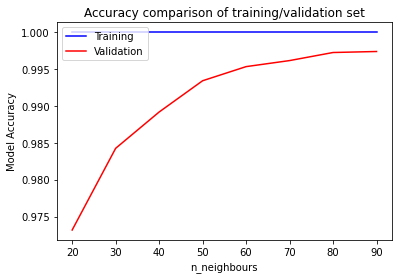

From the graph, we can see that as the No. of neighbours increases, knn model start to reduce overfitting. The best value of No. of neighbours is 60. The overfitting reduction has no significant improvement once the No. of neighbours over 60.


In [278]:
# Mean accuracy score for each value n_neighbours
mean_train_score = np.mean(train_scores, axis=1)
mean_val_score   = np.mean(valid_scores, axis=1)

plt.plot(n_range, mean_train_score, color="blue", linewidth=1.5, label="Training")
plt.plot(n_range, mean_val_score, color="red", linewidth=1.5, label="Validation")
plt.legend(loc="upper left")
plt.xlabel("n_neighbours")
plt.ylabel("Model Accuracy")
plt.title("Accuracy comparison of training/validation set")
plt.show()
print('From the graph, we can see that as the No. of neighbours increases, knn model start to reduce overfitting. The best value of No. of neighbours is 60. The overfitting reduction has no significant improvement once the No. of neighbours over 60.')

In [279]:
knn_state=pd.DataFrame(columns=['No. of neighbours','accuracy_difference','accuracy_train','accuracy_valid'])

knn_state['No. of neighbours']=n_range
knn_state['accuracy_train']=train_scores
knn_state['accuracy_valid']=valid_scores
knn_state['accuracy_difference']=train_scores-valid_scores

print("Validation table shows the first 5 rows of score difference with different No. of neighbours")
knn_state.sort_values(by=['accuracy_difference']).head()

Validation table shows the first 5 rows of score difference with different No. of neighbours


,No. of neighbours,accuracy_difference,accuracy_train,accuracy_valid
4,60,0.001368,1.0,0.998632
5,70,0.001368,1.0,0.998632
6,80,0.001368,1.0,0.998632
7,90,0.001368,1.0,0.998632
3,50,0.002736,1.0,0.997264


#### Train Model after hyperparameter tuning

In [280]:
#adjust the model with number of neighbours to 60
knn_model = KNeighborsClassifier(algorithm='ball_tree',leaf_size=30,n_neighbors=60,weights='distance')

#Fit the model using our training data
knn_model.fit(Xvtrain, yvtrain)

yt_pred_knn=knn_model.predict(Xvtrain) 

results = confusion_matrix(yvtrain, yt_pred_knn)
error = zero_one_loss(yvtrain, yt_pred_knn)
accuracy = accuracy_score(yvtrain, yt_pred_knn)
roc=roc_auc_score(yvtrain, yt_pred_knn)

print("KNN on training data result")
print("--------------------------------------------")
print(classification_report(yvtrain, yt_pred_knn, zero_division=1))
print("ROC AUC score:" , "{:.4f}".format(roc))
print("Accuracy score:", "{:.2%}".format(accuracy))
print("Error rate:" , "{:.0%}".format(error))
print("confusion matrix:")
print(results)

KNN on training data result
--------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5012
           1       1.00      1.00      1.00       833

    accuracy                           1.00      5845
   macro avg       1.00      1.00      1.00      5845
weighted avg       1.00      1.00      1.00      5845

ROC AUC score: 1.0000
Accuracy score: 100.00%
Error rate: 0%
confusion matrix:
[[5012    0]
 [   0  833]]


In [281]:
#use model to predict the validation data
yv_pred_knn=knn_model.predict(Xvalid)

results = confusion_matrix(yvalid, yv_pred_knn)
error = zero_one_loss(yvalid, yv_pred_knn)
accuracy = accuracy_score(yvalid, yv_pred_knn)
roc=roc_auc_score(yvalid, yv_pred_knn)

print("KNN on the validation data result")
print("--------------------------------------------")
print(classification_report(yvalid, yv_pred_knn, zero_division=1))
print("ROC AUC score:" , "{:.4f}".format(roc))
print("Accuracy score:", "{:.2%}".format(accuracy))
print("Error rate:" , "{:.0%}".format(error))
print("confusion matrix:")
print(results)

KNN on the validation data result
--------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1254
           1       0.96      0.99      0.97       208

    accuracy                           0.99      1462
   macro avg       0.98      0.99      0.98      1462
weighted avg       0.99      0.99      0.99      1462

ROC AUC score: 0.9896
Accuracy score: 99.25%
Error rate: 1%
confusion matrix:
[[1246    8]
 [   3  205]]


In [282]:
#use cross validation check if the model improved 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=16)
cv_results = cross_validate(knn_model,Xtrain,ytrain, cv=cv, scoring=scoring,n_jobs=-1)
cv_results
print("Average Scores from 10 folds 3 Repeated Stratified K-Fold cross validation:")
print()
print("Average f1: {}".format(np.mean(cv_results['test_f1'])))
print("Average roc_auc: {}".format(np.mean(cv_results['test_roc_auc'])))
print("Average average_precision: {}".format(np.mean(cv_results['test_average_precision'])))
print("Average accuracy: {}".format(np.mean(cv_results['test_accuracy'])))
print("Average precision: {}".format(np.mean(cv_results['test_precision'])))
print("Average recall: {}".format(np.mean(cv_results['test_recall'])))
f1_list.append(np.mean(cv_results['test_f1']))
roc_auc_list.append(np.mean(cv_results['test_roc_auc']))
average_precision_list.append(np.mean(cv_results['test_average_precision']))
accuracy_list.append(np.mean(cv_results['test_accuracy']))
precision_list.append(np.mean(cv_results['test_precision']))
recall_list.append(np.mean(cv_results['test_recall']))

Average Scores from 10 folds 3 Repeated Stratified K-Fold cross validation:

Average f1: 0.9838444238474723
Average roc_auc: 0.9998231908871728
Average average_precision: 0.9993487207992089
Average accuracy: 0.9953011137554736
Average precision: 0.9695646905567329
Average recall: 0.9987210012210013


### Q5.Model_2 - Support Vector Machine (SVM)

In [283]:
#apply min-max method to normalize the data
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.minmax_scale.html?highlight=min%20max#sklearn.preprocessing.minmax_scale
from sklearn.preprocessing import minmax_scale
Xvtrain_norm=minmax_scale(Xvtrain)
Xvalid_norm=minmax_scale(Xvalid)
Xtrain_norm=minmax_scale(Xtrain) #normalize the training features

In [284]:
from sklearn.svm import SVC #C-support vector classification
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

svm_model = SVC(C=1, class_weight='balanced',random_state=16)#set weight class to penalize class with higher weight

#Fit the model using our training data
svm_model.fit(Xvtrain_norm, yvtrain)

yt_pred_svm=svm_model.predict(Xvtrain_norm)

accuracy = accuracy_score(yvtrain, yt_pred_svm)
roc=roc_auc_score(yvtrain, yt_pred_svm)

print("SVM on training data result")
print()
print("ROC AUC score:" , "{:.2f}".format(roc))
print("Accuracy score:", "{:.0%}".format(accuracy))
print("--------------------------------------------")
#use model to predict the validation data
yv_pred_svm=svm_model.predict(Xvalid_norm) 

accuracy = accuracy_score(yvalid, yv_pred_svm)
roc=roc_auc_score(yvalid, yv_pred_svm)

print("SVM on validation data result")
print()
print("ROC AUC score:" , "{:.2f}".format(roc))
print("Accuracy score:", "{:.0%}".format(accuracy))

SVM on training data result

ROC AUC score: 0.88
Accuracy score: 81%
--------------------------------------------
SVM on validation data result

ROC AUC score: 0.83
Accuracy score: 77%


In [285]:
#check score cross validation 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=16) 
cv_results = cross_validate(svm_model,Xtrain_norm,ytrain, cv=cv, scoring=scoring,n_jobs=-1)
cv_results
print("Average Scores from 10 folds 3 Repeated Stratified K-Fold cross validation:")
print()
print("Average f1: {}".format(np.mean(cv_results['test_f1'])))
print("Average roc_auc: {}".format(np.mean(cv_results['test_roc_auc'])))
print("Average average_precision: {}".format(np.mean(cv_results['test_average_precision'])))
print("Average accuracy: {}".format(np.mean(cv_results['test_accuracy'])))
print("Average precision: {}".format(np.mean(cv_results['test_precision'])))
print("Average recall: {}".format(np.mean(cv_results['test_recall'])))

Average Scores from 10 folds 3 Repeated Stratified K-Fold cross validation:

Average f1: 0.5538076593148936
Average roc_auc: 0.9237539276998247
Average average_precision: 0.599669123441013
Average accuracy: 0.7877384454896964
Average precision: 0.39571033674859124
Average recall: 0.923458485958486


#### Perform GridSearch for SVM

In [286]:
#Perform GridSearch for SVM
gs_start = timeit.default_timer()#set start timer for grid search
parameters = {'C':[1.5,2,2.5,3,3.5,4],#increase C valuse to lower margin to increase accuracy
              'kernel':('linear','rbf','poly','sigmoid'),
              'gamma':('scale','auto'),
              'degree':[2,3,4], #change decision boundary by changing degree
              'random_state':[16],
              'class_weight':['balanced']
             }
svm_model = SVC() 
gs_svm = GridSearchCV(svm_model, parameters,cv=5,n_jobs=-1)
gs_svm.fit(Xtrain_norm, ytrain)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1.5, 2, 2.5, 3, 3.5, 4],
                         'class_weight': ['balanced'], 'degree': [2, 3, 4],
                         'gamma': ('scale', 'auto'),
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
                         'random_state': [16]})

In [287]:
gs_stop=timeit.default_timer() #set stop timer
gs_time_svm=round(gs_stop-gs_start,2) #calculate the time taken
print("Time taken for Gridsearch:" , gs_time_svm, "seconds")

Time taken for Gridsearch: 234.74 seconds


In [288]:
#extract the parameters for the best score
result_svm=pd.DataFrame(data=gs_svm.cv_results_)
result_svm.loc[result_svm.rank_test_score==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_degree,param_gamma,param_kernel,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
138,4.225277,0.303044,0.172605,0.001663,4,balanced,4,scale,poly,16,"{'C': 4, 'class_weight': 'balanced', 'degree':...",0.914501,0.910397,0.928131,0.903491,0.90486,0.912276,0.008855,1


In [289]:
#apply parameter tunning with the result from the GridSearch
svm_model = SVC(kernel='poly',C=4,degree=4,gamma='scale',random_state=16,class_weight='balanced')

#Fit the model using our training data
svm_model.fit(Xvtrain_norm, yvtrain)

yt_pred_svm=svm_model.predict(Xvtrain_norm)

accuracy = accuracy_score(yvtrain, yt_pred_svm)
roc=roc_auc_score(yvtrain, yt_pred_svm)

print("SVM on training data result")
print()
print("ROC AUC score:" , "{:.4f}".format(roc))
print("Accuracy score:", "{:.2%}".format(accuracy))
#use model to predict the validation data
yv_pred_svm=svm_model.predict(Xvalid_norm) 

accuracy = accuracy_score(yvalid, yv_pred_svm)
roc=roc_auc_score(yvalid, yv_pred_svm)
print("--------------------------------------------")
print("SVM on validation data result")
print()
print("ROC AUC score:" , "{:.4f}".format(roc))
print("Accuracy score:", "{:.2%}".format(accuracy))


SVM on training data result

ROC AUC score: 0.9770
Accuracy score: 96.05%
--------------------------------------------
SVM on validation data result

ROC AUC score: 0.9229
Accuracy score: 90.56%


In [290]:
'''The difference of accuracy between training set and validation set result indicate overfitting, proceed to find the lower C value to reudce overfitting'''

'The difference of accuracy between training set and validation set result indicate overfitting, proceed to find the lower C value to reudce overfitting'

#### Appy validation curve to find the best C value and Degree to reduce overfitting

In [291]:
#apply validation curve to find the best c value
c_start = timeit.default_timer()#set start timer 
# range c value from 0.1 to 20 in steps of 0.5
c_range = np.arange(0.1,20,0.5)

# do 5-fold cross-validation for each C value and return the accuracy scores. 
train_scores, valid_scores = validation_curve(svm_model, Xtrain_norm, ytrain, param_name="C", param_range=c_range,
    cv=5, scoring="accuracy",n_jobs=-1)

c_stop=timeit.default_timer() #set stop timer
c_time_svm=round(c_stop-c_start,2) #calculate the time taken
print("Time taken for finding best C value:" , c_time_svm, "seconds")

Time taken for finding best C value: 104.33 seconds


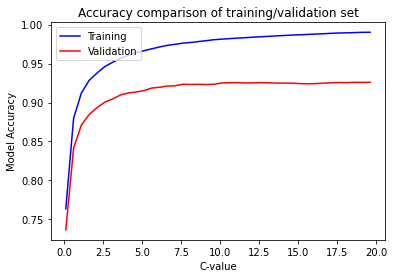

From the plot, we can see that as the C value increases, the SVM model starts to overfit.The best C values is between 0 to 2.5.


In [292]:
# Mean accuracy score for each value of C-value
mean_train_score = np.mean(train_scores, axis=1)
mean_val_score   = np.mean(valid_scores, axis=1)

plt.plot(c_range, mean_train_score, color="blue", linewidth=1.5, label="Training")
plt.plot(c_range, mean_val_score, color="red", linewidth=1.5, label="Validation")
plt.legend(loc="upper left")
plt.xlabel("C-value")
plt.ylabel("Model Accuracy")
plt.title("Accuracy comparison of training/validation set")
plt.show()
print('From the plot, we can see that as the C value increases, the SVM model starts to overfit.The best C values is between 0 to 2.5.')

In [293]:
svm_state=pd.DataFrame(columns=['C_value','accuracy_difference','accuracy_train','accuracy_valid'])

svm_state['C_value']=c_range
svm_state['accuracy_train']=train_scores
svm_state['accuracy_valid']=valid_scores
svm_state['accuracy_difference']=train_scores-valid_scores

print("Validation table shows the first 5 rows of score difference with different C values")
svm_state.sort_values(by=['accuracy_difference']).head()

Validation table shows the first 5 rows of score difference with different C values


,C_value,accuracy_difference,accuracy_train,accuracy_valid
0,0.1,0.036133,0.768007,0.731874
2,1.1,0.039628,0.915141,0.875513
1,0.6,0.043031,0.881608,0.838577
4,2.1,0.043231,0.939264,0.896033
7,3.6,0.045635,0.958084,0.912449


In [294]:
'''The lowest difference of accuracy is when C=0.1, however the accuracy will reduce to around 73% on the validation set. The best balanced C value would be 3.6, the accuracy difference is around 4.56% while maintain around 91% accuracy on the validation set. '''

'The lowest difference of accuracy is when C=0.1, however the accuracy will reduce to around 73% on the validation set. The best balanced C value would be 3.6, the accuracy difference is around 4.56% while maintain around 91% accuracy on the validation set. '

In [295]:
#apply validation curve to find the best degree
d_start = timeit.default_timer()#set start timer 
# range c value from 1 to 6 in steps of 1
d_range = np.arange(1,6,1)

# do 5-fold cross-validation for each degree and return the accuracy scores. 
train_scores, valid_scores = validation_curve(svm_model, Xtrain_norm, ytrain, param_name="degree", param_range=d_range,
    cv=5, scoring="accuracy",n_jobs=-1)

d_stop=timeit.default_timer() #set stop timer
d_time_svm=round(d_stop-d_start,2) #calculate the time taken
print("Time taken for finding best degree:" , d_time_svm, "seconds")

Time taken for finding best degree: 12.8 seconds


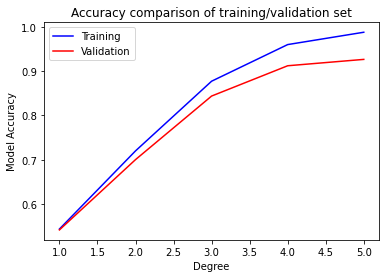

From the graph, we can see as degree increase, model start to overfit


In [296]:
# Mean accuracy score for each degree
mean_train_score = np.mean(train_scores, axis=1)
mean_val_score   = np.mean(valid_scores, axis=1)

plt.plot(d_range, mean_train_score, color="blue", linewidth=1.5, label="Training")
plt.plot(d_range, mean_val_score, color="red", linewidth=1.5, label="Validation")
plt.legend(loc="upper left")
plt.xlabel("Degree")
plt.ylabel("Model Accuracy")
plt.title("Accuracy comparison of training/validation set")
plt.show()
print("From the graph, we can see as degree increase, model start to overfit")

In [297]:
svm_state=pd.DataFrame(columns=['Degree','accuracy_difference','accuracy_train','accuracy_valid'])

svm_state['Degree']=d_range
svm_state['accuracy_train']=train_scores
svm_state['accuracy_valid']=valid_scores
svm_state['accuracy_difference']=train_scores-valid_scores

print("Validation table shows the first 5 rows of score difference with different Degrees")
svm_state.sort_values(by=['accuracy_difference']).head()

Validation table shows the first 5 rows of score difference with different Degrees


,Degree,accuracy_difference,accuracy_train,accuracy_valid
1,2,0.013710,0.725064,0.711354
0,1,0.014479,0.557571,0.543092
2,3,0.036191,0.881608,0.845417
3,4,0.047347,0.961848,0.914501
4,5,0.064802,0.986826,0.922025


In [298]:
'''The lowest difference of accuracy is when degree=2, however the accuracy will reduce to around 71% on the validation set. The best balanced degree would be 4, the accuracy difference is around 4.73% while maintain around 91% accuracy on the validation set. '''

'The lowest difference of accuracy is when degree=2, however the accuracy will reduce to around 71% on the validation set. The best balanced degree would be 4, the accuracy difference is around 4.73% while maintain around 91% accuracy on the validation set. '

#### Train Model after hyperparameter tuning

In [299]:
#change the C value to 3.6 and keep degree as 4 to reduce overfitting
svm_model = SVC(kernel='poly',C=3.6,degree=4,gamma='scale',random_state=16,class_weight='balanced')

#Fit the model using our training data
svm_model.fit(Xvtrain_norm, yvtrain)

yt_pred_svm=svm_model.predict(Xvtrain_norm)

results = confusion_matrix(yvtrain, yt_pred_svm)
error = zero_one_loss(yvtrain, yt_pred_svm)
accuracy = accuracy_score(yvtrain, yt_pred_svm)
roc=roc_auc_score(yvtrain, yt_pred_svm)

print("SVM on training data result")
print("--------------------------------------------")
print(classification_report(yvtrain, yt_pred_svm, zero_division=1))
print("ROC AUC score:" , "{:.4f}".format(roc))
print("Accuracy score:", "{:.2%}".format(accuracy))
print("Error rate:" , "{:.0%}".format(error))
print("confusion matrix:")
print(results)

SVM on training data result
--------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      5012
           1       0.77      1.00      0.87       833

    accuracy                           0.96      5845
   macro avg       0.88      0.97      0.92      5845
weighted avg       0.97      0.96      0.96      5845

ROC AUC score: 0.9749
Accuracy score: 95.69%
Error rate: 4%
confusion matrix:
[[4760  252]
 [   0  833]]


In [300]:
#use model to predict the validation data
yv_pred_svm=svm_model.predict(Xvalid_norm) 

results = confusion_matrix(yvalid, yv_pred_svm)
error = zero_one_loss(yvalid, yv_pred_svm)
accuracy = accuracy_score(yvalid, yv_pred_svm)
roc=roc_auc_score(yvalid, yv_pred_svm)

print("SVM on validation data result")
print("--------------------------------------------")
print(classification_report(yvalid, yv_pred_svm, zero_division=1))
print("ROC AUC score:" , "{:.4f}".format(roc))
print("Accuracy score:", "{:.2%}".format(accuracy))
print("Error rate:" , "{:.0%}".format(error))
print("confusion matrix:")
print(results)

SVM on validation data result
--------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1254
           1       0.61      0.94      0.74       208

    accuracy                           0.91      1462
   macro avg       0.80      0.92      0.84      1462
weighted avg       0.94      0.91      0.91      1462

ROC AUC score: 0.9217
Accuracy score: 90.70%
Error rate: 9%
confusion matrix:
[[1130  124]
 [  12  196]]


In [301]:
#check score cross validation 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=16) 
cv_results = cross_validate(svm_model,Xtrain_norm,ytrain, cv=cv, scoring=scoring,n_jobs=-1)
cv_results
print("Average Scores from 10 folds 3 Repeated Stratified K-Fold cross validation:")
print()
print("Average f1: {}".format(np.mean(cv_results['test_f1'])))
print("Average roc_auc: {}".format(np.mean(cv_results['test_roc_auc'])))
print("Average average_precision: {}".format(np.mean(cv_results['test_average_precision'])))
print("Average accuracy: {}".format(np.mean(cv_results['test_accuracy'])))
print("Average precision: {}".format(np.mean(cv_results['test_precision'])))
print("Average recall: {}".format(np.mean(cv_results['test_recall'])))
f1_list.append(np.mean(cv_results['test_f1']))
roc_auc_list.append(np.mean(cv_results['test_roc_auc']))
average_precision_list.append(np.mean(cv_results['test_average_precision']))
accuracy_list.append(np.mean(cv_results['test_accuracy']))
precision_list.append(np.mean(cv_results['test_precision']))
recall_list.append(np.mean(cv_results['test_recall']))

Average Scores from 10 folds 3 Repeated Stratified K-Fold cross validation:

Average f1: 0.7644699849676092
Average roc_auc: 0.9701405838010427
Average average_precision: 0.7262591926836962
Average accuracy: 0.915104410671564
Average precision: 0.6334157584862619
Average recall: 0.96508547008547


### Q5.Model_3 - Decision Tree

In [302]:
from sklearn.tree import DecisionTreeClassifier

# Build a decision tree model
dtree_model = DecisionTreeClassifier(random_state=16,class_weight='balanced')

#Fit the model using our training data
dtree_model.fit(Xvtrain, yvtrain)

yt_pred_dtree=dtree_model.predict(Xvtrain)

accuracy = accuracy_score(yvtrain, yt_pred_dtree)
roc=roc_auc_score(yvtrain, yt_pred_dtree)

print("Decision Tree on training data result")
print()
print("ROC AUC score:" , "{:.4f}".format(roc))
print("Accuracy score:", "{:.2%}".format(accuracy))
print("--------------------------------------------")
#use model to predict the validation data
yv_pred_dtree=dtree_model.predict(Xvalid) 

accuracy = accuracy_score(yvalid, yv_pred_dtree)
roc=roc_auc_score(yvalid, yv_pred_dtree)

print("Decision Tree on validation data result")
print()
print("ROC AUC score:" , "{:.4f}".format(roc))
print("Accuracy score:", "{:.2%}".format(accuracy))

Decision Tree on training data result

ROC AUC score: 1.0000
Accuracy score: 100.00%
--------------------------------------------
Decision Tree on validation data result

ROC AUC score: 0.9632
Accuracy score: 96.10%


In [303]:
#check score cross validation 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=16)
cv_results = cross_validate(dtree_model,Xtrain,ytrain, cv=cv, scoring=scoring,n_jobs=-1)
cv_results
print("Average Scores from 10 folds 3 Repeated Stratified K-Fold cross validation:")
print()
print("Average f1: {}".format(np.mean(cv_results['test_f1'])))
print("Average roc_auc: {}".format(np.mean(cv_results['test_roc_auc'])))
print("Average average_precision: {}".format(np.mean(cv_results['test_average_precision'])))
print("Average accuracy: {}".format(np.mean(cv_results['test_accuracy'])))
print("Average precision: {}".format(np.mean(cv_results['test_precision'])))
print("Average recall: {}".format(np.mean(cv_results['test_recall'])))

Average Scores from 10 folds 3 Repeated Stratified K-Fold cross validation:

Average f1: 0.8913346655275606
Average roc_auc: 0.9698489527073266
Average average_precision: 0.8048540232002718
Average accuracy: 0.9659238923348887
Average precision: 0.8215647192345512
Average recall: 0.9753388278388279


#### use GridSearch to find the best parameters for tunning 

In [304]:
#use GridSearch to find the best parameters for tunning 
gs_start = timeit.default_timer()#set start timer for grid search
parameters = {'criterion':('gini','entropy'),
              'splitter':('best','random'), 
              'min_samples_leaf':[1,2,3],
              'max_depth':[3,5,10,15,20,25,30,35],
              'max_features':('auto','sqrt','log2',None),
              'random_state':[16],
              'class_weight':['balanced']
              }
gs_dtree = GridSearchCV(dtree_model, parameters,cv=5,n_jobs=-1)
gs_dtree.fit(Xtrain, ytrain)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=16),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'criterion': ('gini', 'entropy'),
                         'max_depth': [3, 5, 10, 15, 20, 25, 30, 35],
                         'max_features': ('auto', 'sqrt', 'log2', None),
                         'min_samples_leaf': [1, 2, 3], 'random_state': [16],
                         'splitter': ('best', 'random')})

In [305]:
gs_stop=timeit.default_timer() #set stop timer
gs_time_dtree=round(gs_stop-gs_start,2)
print("Time taken for Gridsearch:" , gs_time_dtree, "seconds")

Time taken for Gridsearch: 5.2 seconds


In [306]:
#extract the parameters for the best score
result_dtree=pd.DataFrame(data=gs_dtree.cv_results_)
result_dtree.loc[result_dtree.rank_test_score==1].head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_random_state,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
186,0.073807,0.002452,0.003389,0.000088,balanced,gini,35,None,1,16,best,"{'class_weight': 'balanced', 'criterion': 'gin...",0.96922,0.963064,0.96167,0.964408,0.968515,0.965375,0.002988,1


In [307]:
gs_dtree.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=35, random_state=16)

In [308]:
#apply the parameter tunning to the model
dtree_model =DecisionTreeClassifier(max_depth=35,class_weight='balanced',random_state=16)
#Fit the model using our training data
dtree_model.fit(Xvtrain, yvtrain)

yt_pred_dtree=dtree_model.predict(Xvtrain)

accuracy = accuracy_score(yvtrain, yt_pred_dtree)
roc=roc_auc_score(yvtrain, yt_pred_dtree)

print("Decision Tree on training data result")
print()
print("ROC AUC score:" , "{:.4f}".format(roc))
print("Accuracy score:", "{:.2%}".format(accuracy))
print("--------------------------------------------")

#use model to predict the validation data
yv_pred_dtree=dtree_model.predict(Xvalid) 

accuracy = accuracy_score(yvalid, yv_pred_dtree)
roc=roc_auc_score(yvalid, yv_pred_dtree)

print("Decision Tree on validation data result")
print("--------------------------------------------")
print("ROC AUC score:" , "{:.4f}".format(roc))
print("Accuracy score:", "{:.2%}".format(accuracy))

Decision Tree on training data result

ROC AUC score: 1.0000
Accuracy score: 100.00%
--------------------------------------------
Decision Tree on validation data result
--------------------------------------------
ROC AUC score: 0.9632
Accuracy score: 96.10%


#### Tree Pruning - Appy validation curve to find the best Max Tree Depth to reduce overfitting

In [309]:
d_start = timeit.default_timer()#set start timer 

#set tree depth range from 1 to 50 in steps of 5
d_range = np.arange(1,50,5)

# do 10-fold cross-validation for Max Tree depth and return the accuracy scores. 
train_scores, valid_scores = validation_curve(dtree_model, Xtrain, ytrain, param_name="max_depth", param_range=d_range,
    cv=10, scoring="accuracy",n_jobs=-1)

d_stop=timeit.default_timer() #set stop timer
d_time_dtree=round(d_stop-d_start,2) #calculate the time taken
print("Time taken for finding best Max Tree depth:" , d_time_dtree, "seconds")

Time taken for finding best Max Tree depth: 0.89 seconds


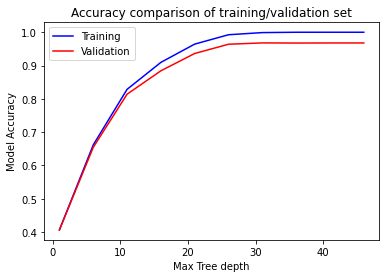

From the graph, we can see that as the Max Tree depth increases, Decision tree model start to overfit.


In [310]:
# Mean accuracy score for each value of C-value
mean_train_score = np.mean(train_scores, axis=1)
mean_val_score   = np.mean(valid_scores, axis=1)

plt.plot(d_range, mean_train_score, color="blue", linewidth=1.5, label="Training")
plt.plot(d_range, mean_val_score, color="red", linewidth=1.5, label="Validation")
plt.legend(loc="upper left")
plt.xlabel("Max Tree depth")
plt.ylabel("Model Accuracy")
plt.title("Accuracy comparison of training/validation set")
plt.show()
print('From the graph, we can see that as the Max Tree depth increases, Decision tree model start to overfit.')

In [311]:
dtree_state=pd.DataFrame(columns=['Max Tree depth','accuracy_difference','accuracy_train','accuracy_valid'])

dtree_state['Max Tree depth']=d_range
dtree_state['accuracy_train']=train_scores
dtree_state['accuracy_valid']=valid_scores
dtree_state['accuracy_difference']=train_scores-valid_scores

print("Validation table shows the first 5 rows of score difference with different Max Tree depth")
dtree_state.sort_values(by=['accuracy_difference']).head()

Validation table shows the first 5 rows of score difference with different Max Tree depth


,Max Tree depth,accuracy_difference,accuracy_train,accuracy_valid
0,1,-0.004223,0.406174,0.410397
1,6,-0.003803,0.661040,0.664843
2,11,0.012850,0.845955,0.833105
4,21,0.023542,0.961983,0.938440
3,16,0.024582,0.908303,0.883721


In [312]:
'''The lowest difference of accuracy is when Max Tree depth=1, however the accuracy will reduce to around 41% on the validation set. The best balanced Max Tree depth would be 21, the accuracy difference is around 2.35% while maintain around 94% accuracy on the validation set. '''

'The lowest difference of accuracy is when Max Tree depth=1, however the accuracy will reduce to around 41% on the validation set. The best balanced Max Tree depth would be 21, the accuracy difference is around 2.35% while maintain around 94% accuracy on the validation set. '

#### Train Model after hyperparameter tuning

In [313]:
dtree_model =DecisionTreeClassifier(max_depth=21,class_weight='balanced',random_state=16)
#Fit the model using our training data
dtree_model.fit(Xvtrain, yvtrain)

yt_pred_dtree=dtree_model.predict(Xvtrain)

results = confusion_matrix(yvtrain, yt_pred_dtree)
error = zero_one_loss(yvtrain, yt_pred_dtree)
accuracy = accuracy_score(yvtrain, yt_pred_dtree)
roc=roc_auc_score(yvtrain, yt_pred_dtree)

print("Decision Tree on training data result")
print("--------------------------------------------")
print(classification_report(yvtrain, yt_pred_dtree, zero_division=1))
print("ROC AUC score:" , "{:.4f}".format(roc))
print("Accuracy score:", "{:.2%}".format(accuracy))
print("Error rate:" , "{:.0%}".format(error))
print("confusion matrix:")
print(results)

Decision Tree on training data result
--------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      5012
           1       0.82      1.00      0.90       833

    accuracy                           0.97      5845
   macro avg       0.91      0.98      0.94      5845
weighted avg       0.97      0.97      0.97      5845

ROC AUC score: 0.9789
Accuracy score: 96.73%
Error rate: 3%
confusion matrix:
[[4825  187]
 [   4  829]]


In [314]:
#use model to predict the validation data
yv_pred_dtree=dtree_model.predict(Xvalid) 

results = confusion_matrix(yvalid, yv_pred_dtree)
error = zero_one_loss(yvalid, yv_pred_dtree)
accuracy = accuracy_score(yvalid, yv_pred_dtree)
roc=roc_auc_score(yvalid, yv_pred_dtree)

print("Decision TRee on validation data result")
print("--------------------------------------------")
print(classification_report(yvalid, yv_pred_dtree, zero_division=1))
print("ROC AUC score:" , "{:.4f}".format(roc))
print("Accuracy score:", "{:.2%}".format(accuracy))
print("Error rate:" , "{:.0%}".format(error))
print("confusion matrix:")
print(results)

Decision TRee on validation data result
--------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.92      0.96      1254
           1       0.67      0.97      0.79       208

    accuracy                           0.93      1462
   macro avg       0.83      0.94      0.87      1462
weighted avg       0.95      0.93      0.93      1462

ROC AUC score: 0.9433
Accuracy score: 92.68%
Error rate: 7%
confusion matrix:
[[1154  100]
 [   7  201]]


In [315]:
#check score cross validation 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=16)
cv_results = cross_validate(dtree_model,Xtrain,ytrain, cv=cv, scoring=scoring,n_jobs=-1)
cv_results
print("Average Scores from 10 folds 3 Repeated Stratified K-Fold cross validation:")
print()
print("Average f1: {}".format(np.mean(cv_results['test_f1'])))
print("Average roc_auc: {}".format(np.mean(cv_results['test_roc_auc'])))
print("Average average_precision: {}".format(np.mean(cv_results['test_average_precision'])))
print("Average accuracy: {}".format(np.mean(cv_results['test_accuracy'])))
print("Average precision: {}".format(np.mean(cv_results['test_precision'])))
print("Average recall: {}".format(np.mean(cv_results['test_recall'])))
f1_list.append(np.mean(cv_results['test_f1']))
roc_auc_list.append(np.mean(cv_results['test_roc_auc']))
average_precision_list.append(np.mean(cv_results['test_average_precision']))
accuracy_list.append(np.mean(cv_results['test_accuracy']))
precision_list.append(np.mean(cv_results['test_precision']))
recall_list.append(np.mean(cv_results['test_recall']))

Average Scores from 10 folds 3 Repeated Stratified K-Fold cross validation:

Average f1: 0.8233576825311496
Average roc_auc: 0.9712633620093265
Average average_precision: 0.7986960503839078
Average accuracy: 0.9394647352410221
Average precision: 0.7086739937020402
Average recall: 0.9843040293040294


### Compare all 3 models performance prior applying to the test set

In [316]:
q5train_score['f1']=f1_list
q5train_score['roc_auc']=roc_auc_list
q5train_score['average_precision']=average_precision_list
q5train_score['accuracy']=accuracy_list
q5train_score['precision']=precision_list
q5train_score['recall']=recall_list

In [317]:
print("3 models performance prior to applying to the test set")
q5train_score

3 models performance prior to applying to the test set


,ML_Model,f1,roc_auc,average_precision,accuracy,precision,recall
0,KNN,0.983844,0.999823,0.999349,0.995301,0.969565,0.998721
1,SVM,0.764470,0.970141,0.726259,0.915104,0.633416,0.965085
2,Decision Tree,0.823358,0.971263,0.798696,0.939465,0.708674,0.984304


### Q5. Apply all 3 models to test set to evaluate performance 

In [318]:
#create a result table for all models
q5result=pd.DataFrame(columns=['ML_Model','f1', 'roc_auc', 'average_precision', 'accuracy', 'precision', 'recall'])

q5result['ML_Model']=('KNN','SVM','Decision Tree')

In [319]:
#KNN model to predict the test data
y_pred_knn=knn_model.predict(Xtest)

results = confusion_matrix(ytest, y_pred_knn)
error = zero_one_loss(ytest, y_pred_knn)

from sklearn.metrics import f1_score
f1=f1_score(ytest, y_pred_knn)
from sklearn.metrics import average_precision_score
average_precision=average_precision_score(ytest, y_pred_knn)
from sklearn.metrics import precision_score
precision=precision_score(ytest, y_pred_knn)
from sklearn.metrics import recall_score
recall=recall_score(ytest, y_pred_knn)

accuracy = accuracy_score(ytest, y_pred_knn)
roc=roc_auc_score(ytest, y_pred_knn)

#add all scores to the table
q5result.iloc[0,1:]=f1,roc,average_precision,accuracy,precision,recall

print("KNN on the test data result")
print("--------------------------------------------")
print(classification_report(ytest, y_pred_knn, zero_division=1))
print("ROC AUC score:" , "{:.4f}".format(roc))
print("Accuracy score:", "{:.2%}".format(accuracy))
print("Error rate:" , "{:.2%}".format(error))
print("confusion matrix:")
print(results)

KNN on the test data result
--------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1560
           1       0.97      0.99      0.98       267

    accuracy                           0.99      1827
   macro avg       0.98      0.99      0.99      1827
weighted avg       0.99      0.99      0.99      1827

ROC AUC score: 0.9915
Accuracy score: 99.34%
Error rate: 0.66%
confusion matrix:
[[1551    9]
 [   3  264]]


In [320]:
#Apply SVM model to the test data

Xtest_norm=minmax_scale(Xtest)#normalize the test set

#use model to predict the test data
y_pred_svm=svm_model.predict(Xtest_norm) 

results = confusion_matrix(ytest, y_pred_svm)
error = zero_one_loss(ytest, y_pred_svm)

f1=f1_score(ytest, y_pred_svm)
average_precision=average_precision_score(ytest, y_pred_svm)
precision=precision_score(ytest, y_pred_svm)
recall=recall_score(ytest, y_pred_svm)
accuracy = accuracy_score(ytest, y_pred_svm)
roc=roc_auc_score(ytest, y_pred_svm)

#add all scores to the table
q5result.iloc[1,1:]=f1,roc,average_precision,accuracy,precision,recall

print("SVM on test data result")
print("--------------------------------------------")
print(classification_report(ytest, y_pred_svm, zero_division=1))
print("ROC AUC score:" , "{:.4f}".format(roc))
print("Accuracy score:", "{:.2%}".format(accuracy))
print("Error rate:" , "{:.2%}".format(error))
print("confusion matrix:")
print(results)

SVM on test data result
--------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.91      0.95      1560
           1       0.64      0.89      0.74       267

    accuracy                           0.91      1827
   macro avg       0.81      0.90      0.85      1827
weighted avg       0.93      0.91      0.92      1827

ROC AUC score: 0.9012
Accuracy score: 91.08%
Error rate: 8.92%
confusion matrix:
[[1427  133]
 [  30  237]]


In [321]:
#apply Decision Tree model to predict the test data

y_pred_dtree=dtree_model.predict(Xtest) 

results = confusion_matrix(ytest, y_pred_dtree)
error = zero_one_loss(ytest, y_pred_dtree)

f1=f1_score(ytest, y_pred_dtree)
average_precision=average_precision_score(ytest, y_pred_dtree)
precision=precision_score(ytest, y_pred_dtree)
recall=recall_score(ytest, y_pred_dtree)
accuracy = accuracy_score(ytest, y_pred_dtree)
roc=roc_auc_score(ytest, y_pred_dtree)

#add all scores to the table
q5result.iloc[2,1:]=f1,roc,average_precision,accuracy,precision,recall

print("Decision Tree on test data result")
print("--------------------------------------------")
print(classification_report(ytest, y_pred_dtree, zero_division=1))
print("ROC AUC score:" , "{:.4f}".format(roc))
print("Accuracy score:", "{:.2%}".format(accuracy))
print("Error rate:" , "{:.2%}".format(error))
print("confusion matrix:")
print(results)

Decision Tree on test data result
--------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1560
           1       0.69      0.98      0.81       267

    accuracy                           0.93      1827
   macro avg       0.84      0.95      0.89      1827
weighted avg       0.95      0.93      0.94      1827

ROC AUC score: 0.9516
Accuracy score: 93.32%
Error rate: 6.68%
confusion matrix:
[[1444  116]
 [   6  261]]


In [322]:
print("Table below shows the test result comparison of all 3 models")
q5result

Table below shows the test result comparison of all 3 models


,ML_Model,f1,roc_auc,average_precision,accuracy,precision,recall
0,KNN,0.977778,0.991497,0.957809,0.993432,0.967033,0.988764
1,SVM,0.744113,0.901192,0.58499,0.910783,0.640541,0.88764
2,Decision Tree,0.810559,0.951585,0.680034,0.933224,0.692308,0.977528


The test result comparison of all 3 models


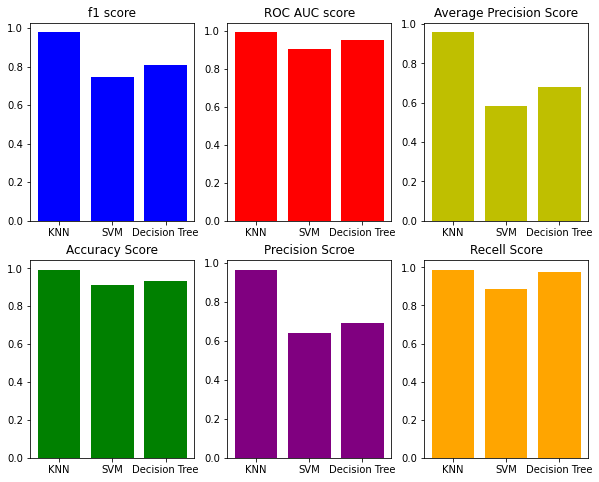

In [323]:
print("The test result comparison of all 3 models")
plt.figure(figsize=(10,8))
plt.subplot(2,3,1)
plt.bar(q5result['ML_Model'],q5result['f1'],color='b')
plt.title('f1 score')
plt.subplot(2,3,2)
plt.bar(q5result['ML_Model'],q5result['roc_auc'],color='r')
plt.title('ROC AUC score')
plt.subplot(2,3,3)
plt.bar(q5result['ML_Model'],q5result['average_precision'],color='y')
plt.title('Average Precision Score')
plt.subplot(2,3,4)
plt.bar(q5result['ML_Model'],q5result['accuracy'], color='g')
plt.title('Accuracy Score')
plt.subplot(2,3,5)
plt.bar(q5result['ML_Model'],q5result['precision'], color='purple')
plt.title('Precision Scroe')
plt.subplot(2,3,6)
plt.bar(q5result['ML_Model'],q5result['recall'], color='orange')
plt.title('Recell Score')
plt.show()

### Q6 Build three ensemble models for predicting customer response.

### Q6 Model_1 Random Forest Classifier 

In [324]:
from sklearn.ensemble import RandomForestClassifier
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

# Build model
rf_model = RandomForestClassifier(random_state=16,class_weight='balanced')

#Fit the model using our training data
rf_model.fit(Xvtrain, yvtrain)

yt_pred_rf=rf_model.predict(Xvtrain)

accuracy = accuracy_score(yvtrain, yt_pred_rf)
roc=roc_auc_score(yvtrain, yt_pred_rf)

print("Random Forest on training data result")
print()
print("ROC AUC score:" , "{:.2f}".format(roc))
print("Accuracy score:", "{:.0%}".format(accuracy))
print("--------------------------------------------")
#use model to predict the validation data
yv_pred_rf=rf_model.predict(Xvalid) 

accuracy = accuracy_score(yvalid, yv_pred_rf)
roc=roc_auc_score(yvalid, yv_pred_rf)

print("Random Forest on validation data result")
print()
print("ROC AUC score:" , "{:.2f}".format(roc))
print("Accuracy score:", "{:.0%}".format(accuracy))

Random Forest on training data result

ROC AUC score: 1.00
Accuracy score: 100%
--------------------------------------------
Random Forest on validation data result

ROC AUC score: 0.98
Accuracy score: 99%


In [325]:
#check score cross validation 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=16)
cv_results = cross_validate(rf_model,Xtrain,ytrain, cv=cv, scoring=scoring ,n_jobs=-1)
cv_results
print("Average Scores from 10 folds 3 Repeated Stratified K-Fold cross validation:")
print()
print("Average f1: {}".format(np.mean(cv_results['test_f1'])))
print("Average roc_auc: {}".format(np.mean(cv_results['test_roc_auc'])))
print("Average average_precision: {}".format(np.mean(cv_results['test_average_precision'])))
print("Average accuracy: {}".format(np.mean(cv_results['test_accuracy'])))
print("Average precision: {}".format(np.mean(cv_results['test_precision'])))
print("Average recall: {}".format(np.mean(cv_results['test_recall'])))

Average Scores from 10 folds 3 Repeated Stratified K-Fold cross validation:

Average f1: 0.9950325873009868
Average roc_auc: 0.9995951424586662
Average average_precision: 0.9991804603521192
Average accuracy: 0.9985861614476946
Average precision: 0.9952349851406456
Average recall: 0.9948778998778999


#### Tree Pruning - Finding best Max Tree depth

In [326]:
d_start = timeit.default_timer()#set start timer 

#set tree depth range from 1 to 80 in steps of 5
d_range = np.arange(1,80,5)

# do 10-fold cross-validation for Max Tree depth and return the accuracy scores. 
train_scores, valid_scores = validation_curve(rf_model, Xtrain, ytrain, param_name="max_depth", param_range=d_range,
    cv=10, scoring="accuracy",n_jobs=-1)

d_stop=timeit.default_timer() #set stop timer
d_time_rf=round(d_stop-d_start,2) #calculate the time taken
print("Time taken for finding best Max Tree depth:" , d_time_rf, "seconds")

Time taken for finding best Max Tree depth: 18.9 seconds


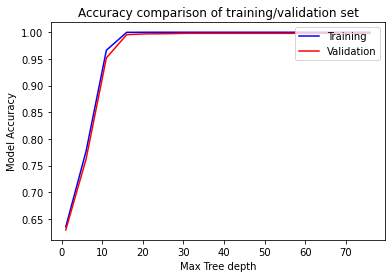

From the graph, we can see no significant improvement after max tree depth reach around 20


In [327]:
# Mean accuracy score
mean_train_score = np.mean(train_scores, axis=1)
mean_val_score   = np.mean(valid_scores, axis=1)

plt.plot(d_range, mean_train_score, color="blue", linewidth=1.5, label="Training")
plt.plot(d_range, mean_val_score, color="red", linewidth=1.5, label="Validation")
plt.legend(loc="upper right")
plt.xlabel("Max Tree depth")
plt.ylabel("Model Accuracy")
plt.title("Accuracy comparison of training/validation set")
plt.show()
print('From the graph, we can see no significant improvement after max tree depth reach around 20')


In [328]:
rf_state=pd.DataFrame(columns=['Max Tree depth','accuracy_difference','accuracy_train','accuracy_valid'])

rf_state['Max Tree depth']=d_range
rf_state['accuracy_train']=train_scores
rf_state['accuracy_valid']=valid_scores
rf_state['accuracy_difference']=train_scores-valid_scores

print("Validation table shows the first 5 rows of score difference with different Max Tree depth")
rf_state.sort_values(by=['accuracy_difference']).head()

Validation table shows the first 5 rows of score difference with different Max Tree depth


,Max Tree depth,accuracy_difference,accuracy_train,accuracy_valid
4,21,0.004104,1.0,0.995896
6,31,0.004104,1.0,0.995896
7,36,0.004104,1.0,0.995896
8,41,0.004104,1.0,0.995896
9,46,0.004104,1.0,0.995896


#### Finding best number of trees

In [329]:
n_start = timeit.default_timer()#set start timer 

#set number of trees range from 100 to 1200 in steps of 500
n_range = np.arange(100,1500,300)

# do 10-fold cross-validation for number of trees and return the accuracy scores. 
train_scores, valid_scores = validation_curve(rf_model, Xtrain, ytrain, param_name="n_estimators", param_range=n_range,
    cv=10, scoring="accuracy",n_jobs=-1)

n_stop=timeit.default_timer() #set stop timer
n_time_rf=round(n_stop-n_start,2) #calculate the time taken
print("Time taken for finding best number of trees:" , n_time_rf, "seconds")

Time taken for finding best number of trees: 48.34 seconds


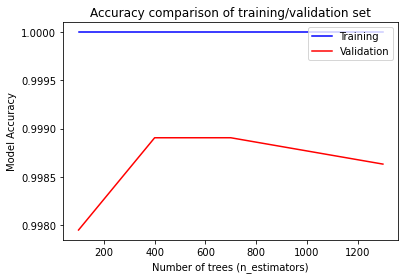

Validation table shows the first 5 rows of score difference with different n_estimators

From the graph, we can see decrease of performance on result after 400 trees (estimatros).


,n_estimators,accuracy_difference,accuracy_train,accuracy_valid
1,400,0.002736,1.0,0.997264
2,700,0.002736,1.0,0.997264
3,1000,0.002736,1.0,0.997264
4,1300,0.002736,1.0,0.997264
0,100,0.004104,1.0,0.995896


In [330]:
# Mean accuracy score 
mean_train_score = np.mean(train_scores, axis=1)
mean_val_score   = np.mean(valid_scores, axis=1)

plt.plot(n_range, mean_train_score, color="blue", linewidth=1.5, label="Training")
plt.plot(n_range, mean_val_score, color="red", linewidth=1.5, label="Validation")
plt.legend(loc="upper right")
plt.xlabel("Number of trees (n_estimators)")
plt.ylabel("Model Accuracy")
plt.title("Accuracy comparison of training/validation set")
plt.show()


rf_state=pd.DataFrame(columns=['n_estimators','accuracy_difference','accuracy_train','accuracy_valid'])

rf_state['n_estimators']=n_range
rf_state['accuracy_train']=train_scores
rf_state['accuracy_valid']=valid_scores
rf_state['accuracy_difference']=train_scores-valid_scores

print("Validation table shows the first 5 rows of score difference with different n_estimators")
print()
print('From the graph, we can see decrease of performance on result after 400 trees (estimatros).')
rf_state.sort_values(by=['accuracy_difference']).head()



#### Train Model after hyperparameter tuning

In [331]:
#Apply the best max depth and best number of trees parameters to the model 
rf_model = RandomForestClassifier(max_depth=21,n_estimators=400,random_state=16,class_weight='balanced')

#Fit the model using our training data
rf_model.fit(Xvtrain, yvtrain)

yt_pred_rf=rf_model.predict(Xvtrain)

accuracy = accuracy_score(yvtrain, yt_pred_rf)
roc=roc_auc_score(yvtrain, yt_pred_rf)

print("Random Forest on training data result")
print()
print("ROC AUC score:" , "{:.2f}".format(roc))
print("Accuracy score:", "{:.2%}".format(accuracy))
print("--------------------------------------------")

#use model to predict the validation data
yv_pred_rf=rf_model.predict(Xvalid) 

accuracy = accuracy_score(yvalid, yv_pred_rf)
roc=roc_auc_score(yvalid, yv_pred_rf)

print("Random Forest on validation data result")
print()
print("ROC AUC score:" , "{:.2f}".format(roc))
print("Accuracy score:", "{:.2%}".format(accuracy))

Random Forest on training data result

ROC AUC score: 1.00
Accuracy score: 100.00%
--------------------------------------------
Random Forest on validation data result

ROC AUC score: 0.99
Accuracy score: 99.59%


In [332]:
#check score cross validation 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=16)
cv_results = cross_validate(rf_model,Xtrain,ytrain, cv=cv, scoring=scoring,n_jobs=-1)
cv_results
print("Average Scores from 10 folds 3 Repeated Stratified K-Fold cross validation:")
print()
print("Average f1: {}".format(np.mean(cv_results['test_f1'])))
print("Average roc_auc: {}".format(np.mean(cv_results['test_roc_auc'])))
print("Average average_precision: {}".format(np.mean(cv_results['test_average_precision'])))
print("Average accuracy: {}".format(np.mean(cv_results['test_accuracy'])))
print("Average precision: {}".format(np.mean(cv_results['test_precision'])))
print("Average recall: {}".format(np.mean(cv_results['test_recall'])))

Average Scores from 10 folds 3 Repeated Stratified K-Fold cross validation:

Average f1: 0.9939069001413138
Average roc_auc: 0.9995915715032496
Average average_precision: 0.9992324377753419
Average accuracy: 0.9982667766055131
Average precision: 0.9939401309957757
Average recall: 0.9939163614163615


### Q6 Model_2 AdaBoost Classifier

In [333]:
from sklearn.ensemble import AdaBoostClassifier
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

# Build model
ada_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=21,class_weight='balanced'),random_state=16)

#Fit the model using our training data
ada_model.fit(Xvtrain, yvtrain)

yt_pred_ada=ada_model.predict(Xvtrain)

accuracy = accuracy_score(yvtrain, yt_pred_ada)
roc=roc_auc_score(yvtrain, yt_pred_ada)

print("AdaBoost on training data result")
print()
print("ROC AUC score:" , "{:.2f}".format(roc))
print("Accuracy score:", "{:.0%}".format(accuracy))
print("--------------------------------------------")
#use model to predict the validation data
yv_pred_ada=ada_model.predict(Xvalid) 

accuracy = accuracy_score(yvalid, yv_pred_ada)
roc=roc_auc_score(yvalid, yv_pred_ada)

print("AdaBoost on validation data result")
print()
print("ROC AUC score:" , "{:.2f}".format(roc))
print("Accuracy score:", "{:.0%}".format(accuracy))

AdaBoost on training data result

ROC AUC score: 1.00
Accuracy score: 100%
--------------------------------------------
AdaBoost on validation data result

ROC AUC score: 0.99
Accuracy score: 100%


In [334]:
#check score cross validation 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=16) 
cv_results = cross_validate(ada_model,Xtrain,ytrain, cv=cv, scoring=scoring,n_jobs=-1)
cv_results
print("Average Scores from 10 folds 3 Repeated Stratified K-Fold cross validation:")
print()
print("Average f1: {}".format(np.mean(cv_results['test_f1'])))
print("Average roc_auc: {}".format(np.mean(cv_results['test_roc_auc'])))
print("Average average_precision: {}".format(np.mean(cv_results['test_average_precision'])))
print("Average accuracy: {}".format(np.mean(cv_results['test_accuracy'])))
print("Average precision: {}".format(np.mean(cv_results['test_precision'])))
print("Average recall: {}".format(np.mean(cv_results['test_recall'])))

Average Scores from 10 folds 3 Repeated Stratified K-Fold cross validation:

Average f1: 0.9974356742999014
Average roc_auc: 0.9991235737946266
Average average_precision: 0.9990898507154492
Average accuracy: 0.9992704058367533
Average precision: 0.9974691869974889
Average recall: 0.9974358974358974


#### Finding best Number of Tree and best learning rate

In [335]:
n_start = timeit.default_timer()#set start timer 

#set number of trees range from 50 to 300 in steps of 10
n_range = np.arange(50,300,10)

# do 5-fold cross-validation for number of trees and return the accuracy scores. 
train_scores, valid_scores = validation_curve(ada_model, Xtrain, ytrain, param_name="n_estimators", param_range=n_range,
    cv=5, scoring="accuracy",n_jobs=-1)

n_stop=timeit.default_timer() #set stop timer
n_time_ada=round(n_stop-n_start,2) #calculate the time taken
print("Time taken for finding best number of trees:" , n_time_ada, "seconds")

Time taken for finding best number of trees: 175.26 seconds


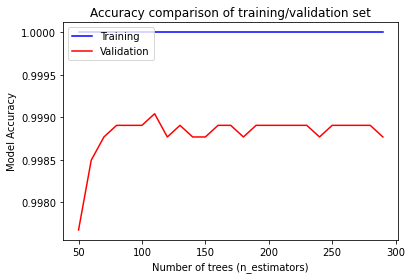

Validation table shows the first 5 rows of score difference with different n_estimators


,n_estimators,accuracy_difference,accuracy_train,accuracy_valid
12,170,0.000000,1.0,1.000000
6,110,0.000000,1.0,1.000000
8,130,0.000000,1.0,1.000000
11,160,0.000000,1.0,1.000000
22,270,0.000684,1.0,0.999316


In [336]:
# Mean accuracy score 
mean_train_score = np.mean(train_scores, axis=1)
mean_val_score   = np.mean(valid_scores, axis=1)

plt.plot(n_range, mean_train_score, color="blue", linewidth=1.5, label="Training")
plt.plot(n_range, mean_val_score, color="red", linewidth=1.5, label="Validation")
plt.legend(loc="upper left")
plt.xlabel("Number of trees (n_estimators)")
plt.ylabel("Model Accuracy")
plt.title("Accuracy comparison of training/validation set")
plt.show()

ada_state=pd.DataFrame(columns=['n_estimators','accuracy_difference','accuracy_train','accuracy_valid'])

ada_state['n_estimators']=n_range
ada_state['accuracy_train']=train_scores
ada_state['accuracy_valid']=valid_scores
ada_state['accuracy_difference']=train_scores-valid_scores

print("Validation table shows the first 5 rows of score difference with different n_estimators")
ada_state.sort_values(by=['accuracy_difference']).head()

In [337]:
l_start = timeit.default_timer()#set start timer 

#set learning rate from 0.01 to 20 in steps of 0.05 since learning rate is very sensitive
l_range = np.arange(0.01,20,0.05)

# do 5-fold cross-validation for learning rate and return the accuracy scores. 
train_scores, valid_scores = validation_curve(ada_model, Xtrain, ytrain, param_name="learning_rate", param_range=l_range,
    cv=5, scoring="accuracy",n_jobs=-1)

l_stop=timeit.default_timer() #set stop timer
l_time_ada=round(l_stop-l_start,2) #calculate the time taken
print("Time taken for finding best learning rate:" , l_time_ada, "seconds")

Time taken for finding best learning rate: 427.59 seconds


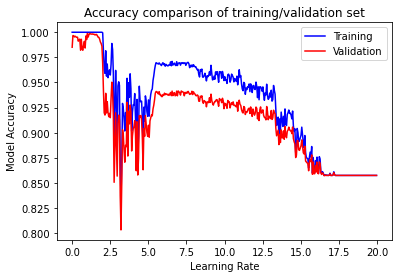

Validation table shows the first 5 rows of score difference with different learning rate


,learning rate,accuracy_difference,accuracy_train,accuracy_valid
2,0.11,0.000000,1.0,1.000000
24,1.21,0.000000,1.0,1.000000
23,1.16,0.000000,1.0,1.000000
31,1.56,0.000684,1.0,0.999316
33,1.66,0.001368,1.0,0.998632


In [338]:
# Mean accuracy score for each value of learning rate
mean_train_score = np.mean(train_scores, axis=1)
mean_val_score   = np.mean(valid_scores, axis=1)

plt.plot(l_range, mean_train_score, color="blue", linewidth=1.5, label="Training")
plt.plot(l_range, mean_val_score, color="red", linewidth=1.5, label="Validation")
plt.legend(loc="upper right")
plt.xlabel("Learning Rate")
plt.ylabel("Model Accuracy")
plt.title("Accuracy comparison of training/validation set")
plt.show()

ada_state=pd.DataFrame(columns=['learning rate','accuracy_difference','accuracy_train','accuracy_valid'])

ada_state['learning rate']=l_range
ada_state['accuracy_train']=train_scores
ada_state['accuracy_valid']=valid_scores
ada_state['accuracy_difference']=train_scores-valid_scores

print("Validation table shows the first 5 rows of score difference with different learning rate")
ada_state.sort_values(by=['accuracy_valid'],ascending=False).head()

In [339]:
'''We now konw the best balanced n_estimators (number of tree) are 110,130,160 and 170. The best balanced learning rate are 0.11,1.16 and 1.21 where highest validation accuracy without any accuracy difference, we can use these parameters to perform GridSearch to identify the exact best-balanced hyperparameter combination'''

'We now konw the best balanced n_estimators (number of tree) are 110,130,160 and 170. The best balanced learning rate are 0.11,1.16 and 1.21 where highest validation accuracy without any accuracy difference, we can use these parameters to perform GridSearch to identify the exact best-balanced hyperparameter combination'

#### use GridSearch to find the best parameters for tunning 

In [340]:
#use GridSearch to find the best parameters for tunning 
gs_start = timeit.default_timer()#set start timer for grid search
parameters = {'n_estimators':(110,130,160,170),
              'learning_rate':(0.11,1.16,1.21), #best learning rate
              'algorithm':('SAMME','SAMME.R'),
             }
gs_ada = GridSearchCV(ada_model, parameters,cv=5,n_jobs=-1)
gs_ada.fit(Xtrain, ytrain)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                                max_depth=21),
                                          random_state=16),
             n_jobs=-1,
             param_grid={'algorithm': ('SAMME', 'SAMME.R'),
                         'learning_rate': (0.11, 1.16, 1.21),
                         'n_estimators': (110, 130, 160, 170)})

In [341]:
gs_stop=timeit.default_timer() #set stop timer
gs_time_ada=round(gs_stop-gs_start,2)
print("Time taken for Gridsearch:" , gs_time_ada, "seconds")

Time taken for Gridsearch: 183.54 seconds


In [342]:
#extract the parameters for the best score
result_ada=pd.DataFrame(data=gs_ada.cv_results_)
result_ada.loc[result_ada.rank_test_score==1].head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
21,22.821196,0.131562,0.254494,0.006394,SAMME.R,1.21,130,"{'algorithm': 'SAMME.R', 'learning_rate': 1.21...",0.998632,0.998632,1.0,0.996578,1.0,0.998768,0.001255,1
22,26.996075,0.493160,0.252806,0.030059,SAMME.R,1.21,160,"{'algorithm': 'SAMME.R', 'learning_rate': 1.21...",0.998632,0.998632,1.0,0.996578,1.0,0.998768,0.001255,1
23,25.194471,1.329793,0.221072,0.002710,SAMME.R,1.21,170,"{'algorithm': 'SAMME.R', 'learning_rate': 1.21...",0.998632,0.998632,1.0,0.996578,1.0,0.998768,0.001255,1


In [343]:
gs_ada.best_estimator_

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=21),
                   learning_rate=1.21, n_estimators=130, random_state=16)

#### Train Model after hyperparameter tuning

In [344]:
# Build model with the best hyperparameter combination
ada_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=21,class_weight='balanced'),algorithm='SAMME.R',learning_rate=1.21,n_estimators=130,random_state=16)

#Fit the model using our training data
ada_model.fit(Xvtrain, yvtrain)

yt_pred_ada=ada_model.predict(Xvtrain)

accuracy = accuracy_score(yvtrain, yt_pred_ada)
roc=roc_auc_score(yvtrain, yt_pred_ada)

print("AdaBoost on training data result")
print()
print("ROC AUC score:" , "{:.2f}".format(roc))
print("Accuracy score:", "{:.2%}".format(accuracy))
print("--------------------------------------------")
#use model to predict the validation data
yv_pred_ada=ada_model.predict(Xvalid) 

accuracy = accuracy_score(yvalid, yv_pred_ada)
roc=roc_auc_score(yvalid, yv_pred_ada)

print("AdaBoost on validation data result")
print()
print("ROC AUC score:" , "{:.2f}".format(roc))
print("Accuracy score:", "{:.2%}".format(accuracy))

AdaBoost on training data result

ROC AUC score: 1.00
Accuracy score: 100.00%
--------------------------------------------
AdaBoost on validation data result

ROC AUC score: 0.99
Accuracy score: 99.73%


In [345]:
#check score cross validation 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=16)
cv_results = cross_validate(ada_model,Xtrain,ytrain, cv=cv, scoring=scoring,n_jobs=-1)
cv_results
print("Average Scores from 10 folds 3 Repeated Stratified K-Fold cross validation:")
print()
print("Average f1: {}".format(np.mean(cv_results['test_f1'])))
print("Average roc_auc: {}".format(np.mean(cv_results['test_roc_auc'])))
print("Average average_precision: {}".format(np.mean(cv_results['test_average_precision'])))
print("Average accuracy: {}".format(np.mean(cv_results['test_accuracy'])))
print("Average precision: {}".format(np.mean(cv_results['test_precision'])))
print("Average recall: {}".format(np.mean(cv_results['test_recall'])))

Average Scores from 10 folds 3 Repeated Stratified K-Fold cross validation:

Average f1: 0.9985475599181856
Average roc_auc: 0.9996457489878542
Average average_precision: 0.99933571173478
Average accuracy: 0.9995894783526663
Average precision: 0.9996794871794871
Average recall: 0.9974358974358974


### Q6 Model_3 Stacking Classifier

In [346]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# Build model
models = [('SVM', make_pipeline(StandardScaler(),SVC(C=1, class_weight='balanced',random_state=16)))
,('dtree', DecisionTreeClassifier(class_weight='balanced',random_state=16))]
st_model = StackingClassifier(cv=5,estimators=models, final_estimator=KNeighborsClassifier())

#Fit the model using our training data
st_model.fit(Xvtrain, yvtrain)

yt_pred_st=st_model.predict(Xvtrain)

accuracy = accuracy_score(yvtrain, yt_pred_st)
roc=roc_auc_score(yvtrain, yt_pred_st)

print("Stacking Classifier on training data result")
print()
print("ROC AUC score:" , "{:.4f}".format(roc))
print("Accuracy score:", "{:.2%}".format(accuracy))
print("--------------------------------------------")
#use model to predict the validation data
yv_pred_st=st_model.predict(Xvalid) 

accuracy = accuracy_score(yvalid, yv_pred_st)
roc=roc_auc_score(yvalid, yv_pred_st)

print("Stacking Classifier on validation data result")
print()
print("ROC AUC score:" , "{:.4f}".format(roc))
print("Accuracy score:", "{:.2%}".format(accuracy))

Stacking Classifier on training data result

ROC AUC score: 0.9952
Accuracy score: 99.86%
--------------------------------------------
Stacking Classifier on validation data result

ROC AUC score: 0.9355
Accuracy score: 96.85%


In [347]:
#check score cross validation 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=16)
cv_results = cross_validate(st_model,Xtrain,ytrain, cv=cv, scoring=scoring,n_jobs=-1)
cv_results
print("Average Scores from 10 folds 3 Repeated Stratified K-Fold cross validation:")
print()
print("Average f1: {}".format(np.mean(cv_results['test_f1'])))
print("Average roc_auc: {}".format(np.mean(cv_results['test_roc_auc'])))
print("Average average_precision: {}".format(np.mean(cv_results['test_average_precision'])))
print("Average accuracy: {}".format(np.mean(cv_results['test_accuracy'])))
print("Average precision: {}".format(np.mean(cv_results['test_precision'])))
print("Average recall: {}".format(np.mean(cv_results['test_recall'])))

Average Scores from 10 folds 3 Repeated Stratified K-Fold cross validation:

Average f1: 0.9063384086131548
Average roc_auc: 0.9771656971841939
Average average_precision: 0.906648042802637
Average accuracy: 0.9728120607911848
Average precision: 0.8910548259892198
Average recall: 0.9228266178266178


#### Train Model appying hyperparameter tuning on each estimator

In [348]:
models = [('SVM', make_pipeline(StandardScaler(),SVC(kernel='poly',C=3.6,degree=4,gamma='scale',random_state=16,class_weight='balanced')))
         ,('dtree', DecisionTreeClassifier(max_depth=21,class_weight='balanced',random_state=16))]

st_model = StackingClassifier(cv=5,estimators=models, final_estimator=KNeighborsClassifier(algorithm='ball_tree',leaf_size=30, n_jobs=1,n_neighbors=60,weights='distance'))

#Fit the model using our training data
st_model.fit(Xvtrain, yvtrain)

yt_pred_st=st_model.predict(Xvtrain)

accuracy = accuracy_score(yvtrain, yt_pred_st)
roc=roc_auc_score(yvtrain, yt_pred_st)

print("Stacking Classifier on training data result")
print()
print("ROC AUC score:" , "{:.4f}".format(roc))
print("Accuracy score:", "{:.2%}".format(accuracy))
print("--------------------------------------------")
#use model to predict the validation data
yv_pred_st=st_model.predict(Xvalid) 

accuracy = accuracy_score(yvalid, yv_pred_st)
roc=roc_auc_score(yvalid, yv_pred_st)

print("Stacking Classifier on validation data result")
print()
print("ROC AUC score:" , "{:.4f}".format(roc))
print("Accuracy score:", "{:.2%}".format(accuracy))

Stacking Classifier on training data result

ROC AUC score: 0.9954
Accuracy score: 99.56%
--------------------------------------------
Stacking Classifier on validation data result

ROC AUC score: 0.9287
Accuracy score: 97.06%


In [349]:
'''Accuracy improved and overfitting reduced after train the model using hyperparameter tunning, proceed to cross validation'''

'Accuracy improved and overfitting reduced after train the model using hyperparameter tunning, proceed to cross validation'

In [350]:
#check score cross validation 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=16)
cv_results = cross_validate(st_model,Xtrain,ytrain, cv=cv, scoring=scoring,n_jobs=-1)
cv_results
print("Average Scores from 10 folds 3 Repeated Stratified K-Fold cross validation:")
print()
print("Average f1: {}".format(np.mean(cv_results['test_f1'])))
print("Average roc_auc: {}".format(np.mean(cv_results['test_roc_auc'])))
print("Average average_precision: {}".format(np.mean(cv_results['test_average_precision'])))
print("Average accuracy: {}".format(np.mean(cv_results['test_accuracy'])))
print("Average precision: {}".format(np.mean(cv_results['test_precision'])))
print("Average recall: {}".format(np.mean(cv_results['test_recall'])))

Average Scores from 10 folds 3 Repeated Stratified K-Fold cross validation:

Average f1: 0.9224172325439167
Average roc_auc: 0.9920013558573967
Average average_precision: 0.9598173072591786
Average accuracy: 0.9776017090493414
Average precision: 0.911485854214343
Average recall: 0.9343498168498169


### Q6. Apply all 3 models to test set to evaluate performance 

In [351]:
q6result=q5result.copy()

In [352]:
#apply Random Forest model to predict the test data

y_pred_rf=rf_model.predict(Xtest) 

results = confusion_matrix(ytest, y_pred_rf)
error = zero_one_loss(ytest, y_pred_rf)
accuracy = accuracy_score(ytest, y_pred_rf)
roc=roc_auc_score(ytest, y_pred_rf)
f1=f1_score(ytest, y_pred_rf)
average_precision=average_precision_score(ytest, y_pred_rf)
precision=precision_score(ytest, y_pred_rf)
recall=recall_score(ytest, y_pred_rf)
accuracy = accuracy_score(ytest, y_pred_rf)
roc=roc_auc_score(ytest, y_pred_rf)

#add all scores to the table
q6result.loc[3,'ML_Model']='Random Forest'
q6result.iloc[3,1:]=f1,roc,average_precision,accuracy,precision,recall

print("Random Forest on test data result")
print("--------------------------------------------")
print(classification_report(ytest, y_pred_rf, zero_division=1))
print("ROC AUC score:" , "{:.4f}".format(roc))
print("Accuracy score:", "{:.2%}".format(accuracy))
print("Error rate:" , "{:.2%}".format(error))
print("confusion matrix:")
print(results)

Random Forest on test data result
--------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1560
           1       0.99      0.97      0.98       267

    accuracy                           0.99      1827
   macro avg       0.99      0.98      0.99      1827
weighted avg       0.99      0.99      0.99      1827

ROC AUC score: 0.9844
Accuracy score: 99.45%
Error rate: 0.55%
confusion matrix:
[[1558    2]
 [   8  259]]


In [353]:
y_pred_ada=ada_model.predict(Xtest) 

results = confusion_matrix(ytest, y_pred_ada)
error = zero_one_loss(ytest, y_pred_ada)
accuracy = accuracy_score(ytest, y_pred_ada)
roc=roc_auc_score(ytest, y_pred_ada)
f1=f1_score(ytest, y_pred_ada)
average_precision=average_precision_score(ytest, y_pred_ada)
precision=precision_score(ytest, y_pred_ada)
recall=recall_score(ytest, y_pred_ada)
accuracy = accuracy_score(ytest, y_pred_ada)
roc=roc_auc_score(ytest, y_pred_ada)

#add all scores to the table
q6result.loc[4,'ML_Model']='AdaBoost'
q6result.iloc[4,1:]=f1,roc,average_precision,accuracy,precision,recall


print("AdaBoost on test data result")
print("--------------------------------------------")
print(classification_report(ytest, y_pred_ada, zero_division=1))
print("ROC AUC score:" , "{:.4f}".format(roc))
print("Accuracy score:", "{:.2%}".format(accuracy))
print("Error rate:" , "{:.2%}".format(error))
print("confusion matrix:")
print(results)

AdaBoost on test data result
--------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1560
           1       1.00      0.99      0.99       267

    accuracy                           1.00      1827
   macro avg       1.00      0.99      1.00      1827
weighted avg       1.00      1.00      1.00      1827

ROC AUC score: 0.9925
Accuracy score: 99.78%
Error rate: 0.22%
confusion matrix:
[[1560    0]
 [   4  263]]


In [354]:
y_pred_st=st_model.predict(Xtest) 

results = confusion_matrix(ytest, y_pred_st)
error = zero_one_loss(ytest, y_pred_st)
accuracy = accuracy_score(ytest, y_pred_st)
roc=roc_auc_score(ytest, y_pred_st)
f1=f1_score(ytest, y_pred_st)
average_precision=average_precision_score(ytest, y_pred_st)
precision=precision_score(ytest, y_pred_st)
recall=recall_score(ytest, y_pred_st)
accuracy = accuracy_score(ytest, y_pred_st)
roc=roc_auc_score(ytest, y_pred_st)

#add all scores to the table
q6result.loc[5,'ML_Model']='Stacking'
q6result.iloc[5,1:]=f1,roc,average_precision,accuracy,precision,recall


print("Stacking Classifier on test data result")
print("--------------------------------------------")
print(classification_report(ytest, y_pred_st, zero_division=1))
print("ROC AUC score:" , "{:.4f}".format(roc))
print("Accuracy score:", "{:.2%}".format(accuracy))
print("Error rate:" , "{:.2%}".format(error))
print("confusion matrix:")
print(results)

Stacking Classifier on test data result
--------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1560
           1       0.91      0.92      0.92       267

    accuracy                           0.98      1827
   macro avg       0.95      0.95      0.95      1827
weighted avg       0.98      0.98      0.98      1827

ROC AUC score: 0.9530
Accuracy score: 97.54%
Error rate: 2.46%
confusion matrix:
[[1536   24]
 [  21  246]]


In [355]:
print("The test result comparison of all 6 models")
q6result

The test result comparison of all 6 models


,ML_Model,f1,roc_auc,average_precision,accuracy,precision,recall
0,KNN,0.977778,0.991497,0.957809,0.993432,0.967033,0.988764
1,SVM,0.744113,0.901192,0.58499,0.910783,0.640541,0.88764
2,Decision Tree,0.810559,0.951585,0.680034,0.933224,0.692308,0.977528
3,Random Forest,0.981061,0.984378,0.966983,0.994527,0.992337,0.970037
4,AdaBoost,0.992453,0.992509,0.987208,0.997811,1.0,0.985019
5,Stacking,0.916201,0.952982,0.850945,0.975369,0.911111,0.921348


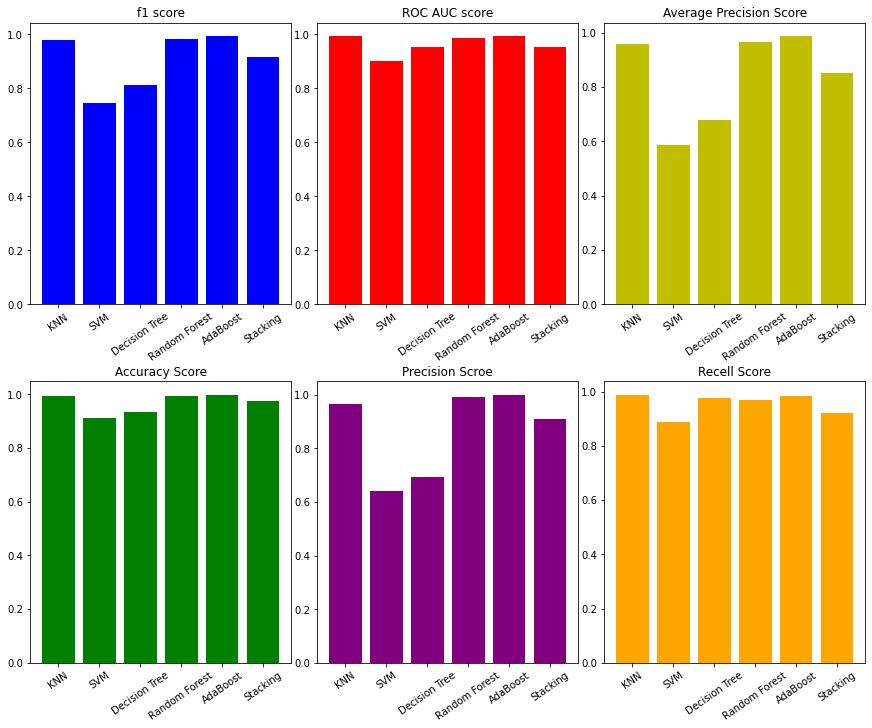

In [356]:
plt.figure(figsize=(12,10))#set plots size
plt.subplot(2,3,1)
plt.bar(q6result['ML_Model'],q6result['f1'],color='b')
plt.xticks(rotation=35) 
plt.title('f1 score')
plt.subplot(2,3,2)
plt.bar(q6result['ML_Model'],q6result['roc_auc'],color='r')
plt.xticks(rotation=35) 
plt.title('ROC AUC score')
plt.subplot(2,3,3)
plt.bar(q6result['ML_Model'],q6result['average_precision'],color='y')
plt.xticks(rotation=35) 
plt.title('Average Precision Score')
plt.subplot(2,3,4)
plt.bar(q6result['ML_Model'],q6result['accuracy'], color='g')
plt.xticks(rotation=35) 
plt.title('Accuracy Score')
plt.subplot(2,3,5)
plt.bar(q6result['ML_Model'],q6result['precision'], color='purple')
plt.xticks(rotation=35) 
plt.title('Precision Scroe')
plt.subplot(2,3,6)
plt.bar(q6result['ML_Model'],q6result['recall'], color='orange')
plt.xticks(rotation=35) 
plt.title('Recell Score')
plt.tight_layout(pad=0.3)#create spacing between subplots
plt.show()

### Q6.e Ensemble model ML classifier other than Decision Tree

In [357]:
#replace decision tree model with logistic Regression model
models = [('SVM', make_pipeline(StandardScaler(),SVC(C=1, class_weight='balanced',random_state=16)))
         ,('lr', LogisticRegressionCV(cv=5,random_state=16,max_iter=10000,class_weight='balanced'))]

st_model_nt = StackingClassifier(cv=5,estimators=models, final_estimator=KNeighborsClassifier(algorithm='ball_tree',leaf_size=30, n_jobs=1,n_neighbors=60,weights='distance'))

st_model_nt

StackingClassifier(cv=5,
                   estimators=[('SVM',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('svc',
                                                 SVC(C=1,
                                                     class_weight='balanced',
                                                     random_state=16))])),
                               ('lr',
                                LogisticRegressionCV(class_weight='balanced',
                                                     cv=5, max_iter=10000,
                                                     random_state=16))],
                   final_estimator=KNeighborsClassifier(algorithm='ball_tree',
                                                        n_jobs=1,
                                                        n_neighbors=60,
                                                     

In [358]:
#Fit the model using our training data
st_model_nt.fit(Xvtrain, yvtrain)

yt_pred_st_nt=st_model_nt.predict(Xvtrain)

accuracy = accuracy_score(yvtrain, yt_pred_st_nt)
roc=roc_auc_score(yvtrain, yt_pred_st_nt)

print("Stacking Classifier (No Decision tree) on training data result")
print()
print("ROC AUC score:" , "{:.4f}".format(roc))
print("Accuracy score:", "{:.2%}".format(accuracy))
print("--------------------------------------------")
#use model to predict the validation data
yv_pred_st_nt=st_model.predict(Xvalid) 

accuracy = accuracy_score(yvalid, yv_pred_st_nt)
roc=roc_auc_score(yvalid, yv_pred_st_nt)

print("Stacking Classifier (No Decision tree) on validation data result")
print()
print("ROC AUC score:" , "{:.4f}".format(roc))
print("Accuracy score:", "{:.2%}".format(accuracy))

Stacking Classifier (No Decision tree) on training data result

ROC AUC score: 0.9421
Accuracy score: 96.08%
--------------------------------------------
Stacking Classifier (No Decision tree) on validation data result

ROC AUC score: 0.9287
Accuracy score: 97.06%


In [359]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=16)
cv_results = cross_validate(st_model_nt,Xtrain,ytrain, cv=cv, scoring=scoring,n_jobs=-1)
cv_results
print("Average Scores from 10 folds 3 Repeated Stratified K-Fold cross validation:")
print()
print("Average f1: {}".format(np.mean(cv_results['test_f1'])))
print("Average roc_auc: {}".format(np.mean(cv_results['test_roc_auc'])))
print("Average average_precision: {}".format(np.mean(cv_results['test_average_precision'])))
print("Average accuracy: {}".format(np.mean(cv_results['test_accuracy'])))
print("Average precision: {}".format(np.mean(cv_results['test_precision'])))
print("Average recall: {}".format(np.mean(cv_results['test_recall'])))

Average Scores from 10 folds 3 Repeated Stratified K-Fold cross validation:

Average f1: 0.7274272621831286
Average roc_auc: 0.951592761534749
Average average_precision: 0.781432545976292
Average accuracy: 0.9241378858010232
Average precision: 0.7461948139929802
Average recall: 0.7114407814407816


In [360]:
y_pred_st_nt=st_model.predict(Xtest) 

results = confusion_matrix(ytest, y_pred_st_nt)
error = zero_one_loss(ytest, y_pred_st_nt)
accuracy = accuracy_score(ytest, y_pred_st_nt)
roc=roc_auc_score(ytest, y_pred_st_nt)

print("Stacking Classifier (No Decision tree) test data result")
print("--------------------------------------------")
print(classification_report(ytest, y_pred_st_nt, zero_division=1))
print("ROC AUC score:" , "{:.4f}".format(roc))
print("Accuracy score:", "{:.2%}".format(accuracy))
print("Error rate:" , "{:.2%}".format(error))
print("confusion matrix:")
print(results)

Stacking Classifier (No Decision tree) test data result
--------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1560
           1       0.91      0.92      0.92       267

    accuracy                           0.98      1827
   macro avg       0.95      0.95      0.95      1827
weighted avg       0.98      0.98      0.98      1827

ROC AUC score: 0.9530
Accuracy score: 97.54%
Error rate: 2.46%
confusion matrix:
[[1536   24]
 [  21  246]]


In [361]:
stop=timeit.default_timer() #set stop timer
time=round((stop-start)/60,2)
print("Time taken to run this project:" , time, "minutes")

Time taken to run this project: 26.48 minutes
